In [1]:
import os
os.chdir('/home/ssobti/projects/mir_tud/packages/ciberatac-main/src/mave')
import pandas as pd
import numpy as np
import scanpy as sc
import itertools
import pickle
import shelve

In [2]:
sc.settings.verbosity = 3        # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

2023-02-19 18:12:34.514131: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.23.5 scipy==1.10.0 pandas==1.5.2 scikit-learn==1.2.0 statsmodels==0.13.5 pynndescent==0.5.8


In [3]:
adata = sc.read('/home/ssobti/projects/mir_tud/010523_filtered_data/miR.concat.raw.adata_gex.guide_assigned.h5ad')

Only considering the two last: ['.guide_assigned', '.h5ad'].
Only considering the two last: ['.guide_assigned', '.h5ad'].


In [4]:
adata2 = sc.read('/home/ssobti/projects/mir_tud/010523_filtered_data/miR.integrated.qc_norm_scaled.dimred.clustered.gex.guide_assigned.h5ad')

Only considering the two last: ['.guide_assigned', '.h5ad'].
Only considering the two last: ['.guide_assigned', '.h5ad'].


/home/ssobti/miniconda3/envs/mave/lib/python3.10/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


In [5]:
adata2.obs

orig.ident  nCount_RNA  nFeature_RNA sample  \
miR_1:AAACCCAAGGAGAGGC-1        miR     33954.0          5998  miR_1   
miR_1:AAACCCAAGGTAAACT-1        miR     31928.0          6868  miR_1   
miR_1:AAACCCACAACGATCT-1        miR     42785.0          7447  miR_1   
miR_1:AAACCCACACGATTCA-1        miR     58537.0          8039  miR_1   
miR_1:AAACCCACAGTCAACT-1        miR     31579.0          6580  miR_1   
...                             ...         ...           ...    ...   
miR_3:TTTGGTTTCGGACTTA-1        miR     25937.0          5525  miR_3   
miR_3:TTTGTTGCACGCGTGT-1        miR     82115.0          8826  miR_3   
miR_3:TTTGTTGCATAGATCC-1        miR     34833.0          6430  miR_3   
miR_3:TTTGTTGGTCTAGTGT-1        miR     22318.0          5103  miR_3   
miR_3:TTTGTTGGTTTCCATT-1        miR     19834.0          5082  miR_3   

                                   barcode             guide       lor  \
miR_1:AAACCCAAGGAGAGGC-1  AAACCCAAGGAGAGGC   hsa-miR-203a-3p  5.453121   
miR_1:AAACCCAAGGTAAACT-1  AAACCCAAGGTAAACT     hsa-miR-93-3p  6.012001   
miR_1:AAACCCACAACGATCT-1  AAACCCACAACGATCT   hsa-miR-130b-3p  5.864701   
miR_1:AAACCCACACGATTCA-1  AAACCCACACGATTCA         TuD_NC_18  5.859895   
miR_1:AAACCCACAGTCAACT-1  AAACCCACAGTCAACT   hsa-miR-147b-5p  5.632808   
...                                    ...               ...       ...   
miR_3:TTTGGTTTCGGACTTA-1  TTTGGTTTCGGACTTA    hsa-miR-616-5p  3.885564   
miR_3:TTTGTTGCACGCGTGT-1  TTTGTTGCACGCGTGT    hsa-miR-361-5p  0.506602   
miR_3:TTTGTTGCATAGATCC-1  TTTGTTGCATAGATCC   hsa-miR-548o-3p  6.603449   
miR_3:TTTGTTGGTCTAGTGT-1  TTTGTTGGTCTAGTGT   hsa-miR-3940-5p  2.402414   
miR_3:TTTGTTGGTTTCCATT-1  TTTGTTGGTTTCCATT  hsa-miR-10527-5p  6.014592   

                                 pvalue     adj_pvalue  max_umi  ...  \
miR_1:AAACCCAAGGAGAGGC-1  2.983000e-159  3.010603e-152     67.0  ...   
miR_1:AAACCCAAGGTAAACT-1  3.907611e-225  3.943769e-218     97.0  ...   
miR_1:AAACCCACAACGATCT-1  3.299362e-202  3.329893e-195     89.0  ...   
miR_1:AAACCCACACGATTCA-1  2.574602e-201  2.598426e-194     96.0  ...   
miR_1:AAACCCACAGTCAACT-1  3.564463e-178  3.597446e-171     71.0  ...   
...                                 ...            ...      ...  ...   
miR_3:TTTGGTTTCGGACTTA-1  8.005527e-277  6.410418e-270    129.0  ...   
miR_3:TTTGTTGCACGCGTGT-1   8.834341e-07   1.000000e+00      2.0  ...   
miR_3:TTTGTTGCATAGATCC-1  5.795787e-306  4.640971e-299    126.0  ...   
miR_3:TTTGTTGGTCTAGTGT-1  5.349572e-125  4.283664e-118     58.0  ...   
miR_3:TTTGTTGGTTTCCATT-1  4.169835e-209  3.338991e-202    101.0  ...   

                             m_umi      v_umi  log_max_umi  log_n_umi  \
miR_1:AAACCCAAGGAGAGGC-1  0.196474  11.324937     1.826075   1.892095   
miR_1:AAACCCAAGGTAAACT-1  0.272040  23.713686     1.986772   2.033424   
miR_1:AAACCCACAACGATCT-1  0.284635  19.981910     1.949390   2.053078   
miR_1:AAACCCACACGATTCA-1  0.287154  23.235516     1.982271   2.056905   
miR_1:AAACCCACAGTCAACT-1  0.216625  12.725683     1.851258   1.934498   
...                            ...        ...          ...        ...   
miR_3:TTTGGTTTCGGACTTA-1  0.596977  44.983627     2.110590   2.374748   
miR_3:TTTGTTGCACGCGTGT-1  0.030227   0.034438     0.301030   1.079181   
miR_3:TTTGTTGCATAGATCC-1  0.400504  40.028586     2.100371   2.201397   
miR_3:TTTGTTGGTCTAGTGT-1  0.277078   9.251317     1.763428   2.041393   
miR_3:TTTGTTGGTTTCCATT-1  0.329975  25.736801     2.004321   2.117271   

                          log_m_umi  percent.mt  integrated_snn_res.0.5  \
miR_1:AAACCCAAGGAGAGGC-1  -0.706696    8.576309                       2   
miR_1:AAACCCAAGGTAAACT-1  -0.565367    6.549110                       0   
miR_1:AAACCCACAACGATCT-1  -0.545712    8.844221                       0   
miR_1:AAACCCACACGATTCA-1  -0.541886   10.072262                       1   
miR_1:AAACCCACAGTCAACT-1  -0.664292    7.698154                       8   
...                             ...         ...                     ...   
miR_

In [6]:
## make sure to only keep that were present in Larisa's normalized data
cells_to_keep = [cell for cell in adata2.obs.index.to_list() if cell in adata.obs.index.to_list()]
adata = adata[cells_to_keep,:]

In [7]:
list(adata.obs.index) == list(adata2.obs.index)

True

In [8]:
adata.obs.loc[:,'guide'] = adata2.obs.loc[:,'miR.family']

/tmp/ipykernel_81914/2483903368.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  adata.obs.loc[:,'guide'] = adata2.obs.loc[:,'miR.family']


In [9]:
adata.obs

sample           barcode                      guide  \
miR_1:AAACCCAAGGAGAGGC-1  miR_1  AAACCCAAGGAGAGGC              miR-203a-3p.1   
miR_1:AAACCCAAGGTAAACT-1  miR_1  AAACCCAAGGTAAACT                  miR-93-3p   
miR_1:AAACCCACAACGATCT-1  miR_1  AAACCCACAACGATCT   miR-130-3p/301-3p/454-3p   
miR_1:AAACCCACACGATTCA-1  miR_1  AAACCCACACGATTCA                         NA   
miR_1:AAACCCACAGTCAACT-1  miR_1  AAACCCACAGTCAACT                   miR-147b   
...                         ...               ...                        ...   
miR_3:TTTGGTTTCGGACTTA-1  miR_3  TTTGGTTTCGGACTTA  miR-371b-5p/373-5p/616-5p   
miR_3:TTTGTTGCACGCGTGT-1  miR_3  TTTGTTGCACGCGTGT                 miR-361-5p   
miR_3:TTTGTTGCATAGATCC-1  miR_3  TTTGTTGCATAGATCC                   miR-1323   
miR_3:TTTGTTGGTCTAGTGT-1  miR_3  TTTGTTGGTCTAGTGT           miR-3940-5p/4507   
miR_3:TTTGTTGGTTTCCATT-1  miR_3  TTTGTTGGTTTCCATT           hsa-miR-10527-5p   

                               lor         pvalue     adj_pvalue  max_umi  \
miR_1:AAACCCAAGGAGAGGC-1  5.453121  2.983000e-159  3.010603e-152     67.0   
miR_1:AAACCCAAGGTAAACT-1  6.012001  3.907611e-225  3.943769e-218     97.0   
miR_1:AAACCCACAACGATCT-1  5.864701  3.299362e-202  3.329893e-195     89.0   
miR_1:AAACCCACACGATTCA-1  5.859895  2.574602e-201  2.598426e-194     96.0   
miR_1:AAACCCACAGTCAACT-1  5.632808  3.564463e-178  3.597446e-171     71.0   
...                            ...            ...            ...      ...   
miR_3:TTTGGTTTCGGACTTA-1  3.885564  8.005527e-277  6.410418e-270    129.0   
miR_3:TTTGTTGCACGCGTGT-1  0.506602   8.834341e-07   1.000000e+00      2.0   
miR_3:TTTGTTGCATAGATCC-1  6.603449  5.795787e-306  4.640971e-299    126.0   
miR_3:TTTGTTGGTCTAGTGT-1  2.402414  5.349572e-125  4.283664e-118     58.0   
miR_3:TTTGTTGGTTTCCATT-1  6.014592  4.169835e-209  3.338991e-202    101.0   

                          n_umi     m_umi      v_umi  log_max_umi  log_n_umi  \
miR_1:AAACCCAAGGAGAGGC-1   78.0  0.196474  11.324937     1.826075   1.892095   
miR_1:AAACCCAAGGTAAACT-1  108.0  0.272040  23.713686     1.986772   2.033424   
miR_1:AAACCCACAACGATCT-1  113.0  0.284635  19.981910     1.949390   2.053078   
miR_1:AAACCCACACGATTCA-1  114.0  0.287154  23.235516     1.982271   2.056905   
miR_1:AAACCCACAGTCAACT-1   86.0  0.216625  12.725683     1.851258   1.934498   
...                         ...       ...        ...          ...        ...   
miR_3:TTTGGTTTCGGACTTA-1  237.0  0.596977  44.983627     2.110590   2.374748   
miR_3:TTTGTTGCACGCGTGT-1   12.0  0.030227   0.034438     0.301030   1.079181   
miR_3:TTTGTTGCATAGATCC-1  159.0  0.400504  40.028586     2.100371   2.201397   
miR_3:TTTGTTGGTCTAGTGT-1  110.0  0.277078   9.251317     1.763428   2.041393   
miR_3:TTTGTTGGTTTCCATT-1  131.0  0.329975  25.736801     2.004321   2.117271   

                          log_m_umi  
miR_1:AAACCCAAGGAGAGGC-1  -0.706696  
miR_1:AAACCCAAGGTAAACT-1  -0.565367  
miR_1:AAACCCACAACGATCT-1  -0.545712  
miR_1:AAACCCACACGATTCA-1  -0.541886  
miR_1:AAACCCACAGTCAACT-1  -0.664292  
...                             ...  
miR_3:TTTGGTTTCGGACTTA-1  -0.224042  
miR_3:TTTGTTGCACGCGTGT-1  -1.519609  
miR_3:TTTGTTGCATAGATCC-1  -0.397393  
miR_3:TTTGTTGGTCTAGTGT-1  -0.557398  
miR_3:TTTGTTGGTTTCCATT-1  -0.481519  

[29348 rows x 13 columns]

In [10]:
del adata2

In [11]:
### feed in raw matrix (adata.X) into VAE with filter out cells with low # genes and genes expressed in low # of cells
adata.var_names_make_unique()

In [12]:
adata.shape

(29348, 36601)

normalizing counts per cell
    finished (0:00:01)


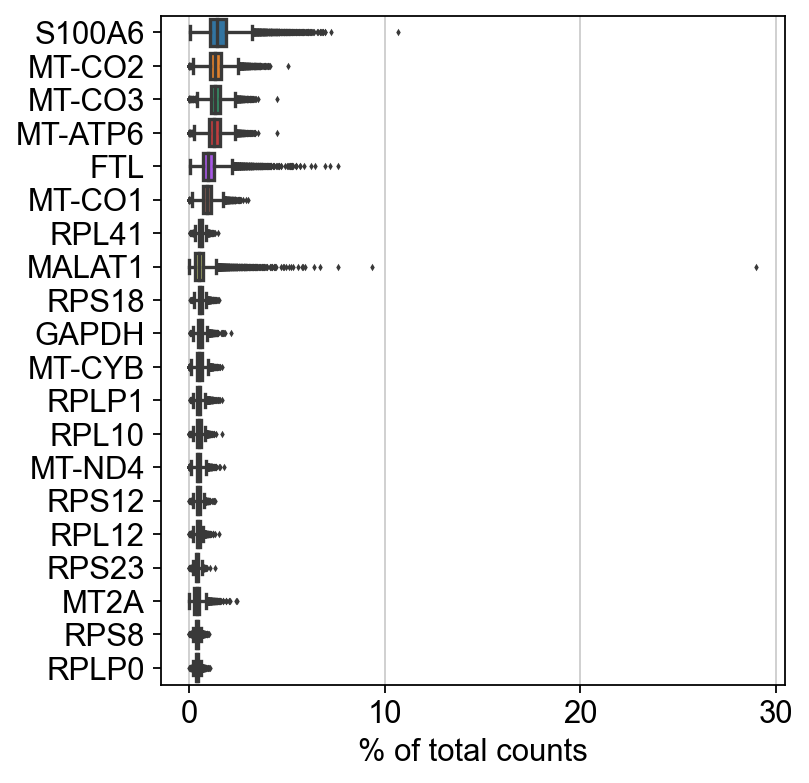

In [13]:
sc.pl.highest_expr_genes(adata, n_top=20)

In [14]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 6388 genes that are detected in less than 3 cells


In [15]:
adata.shape

(29348, 30213)

In [16]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

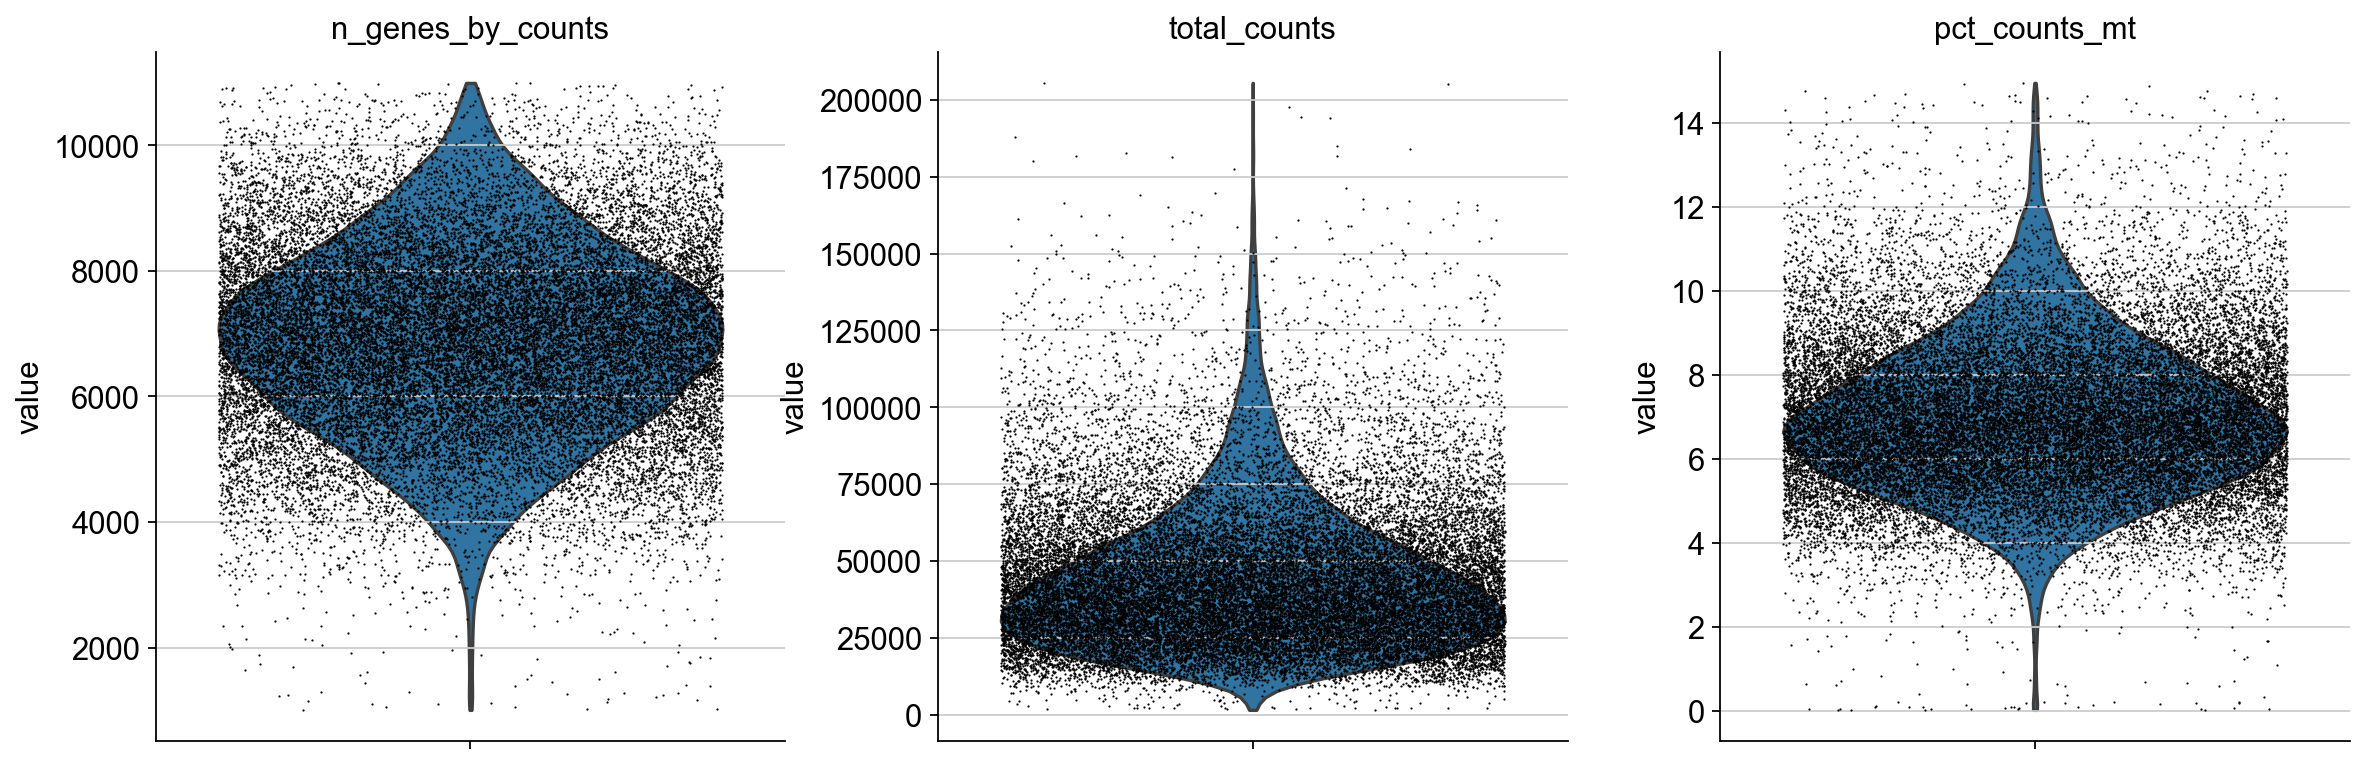

In [17]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

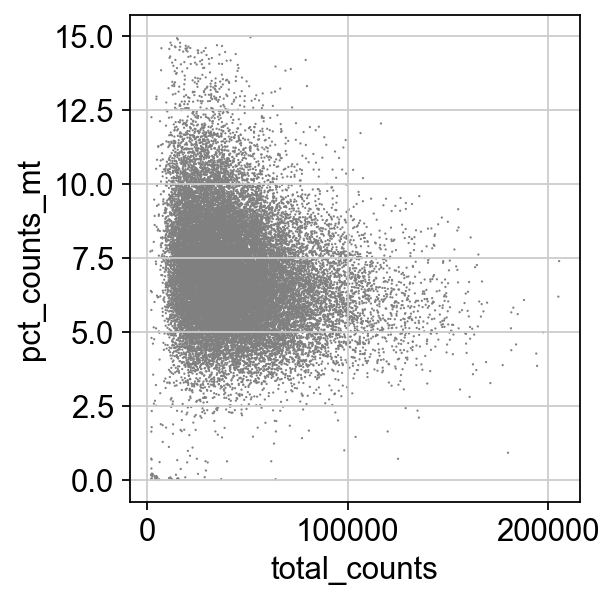

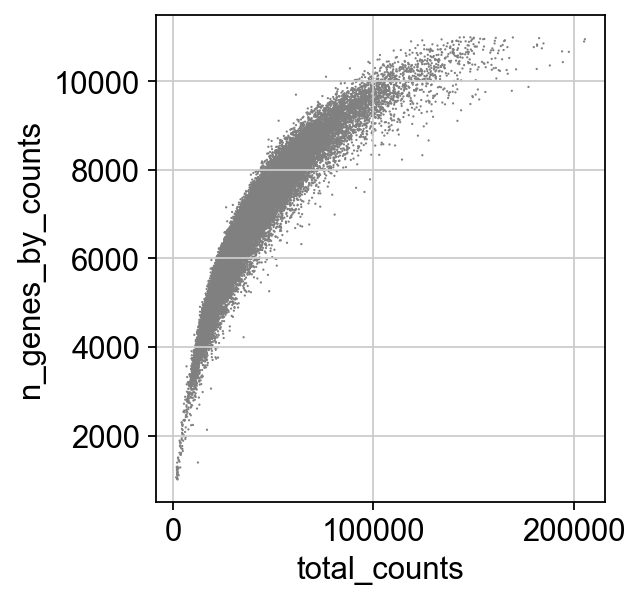

In [18]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt',)
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [19]:
adata = adata[adata.obs.pct_counts_mt < 15, :]

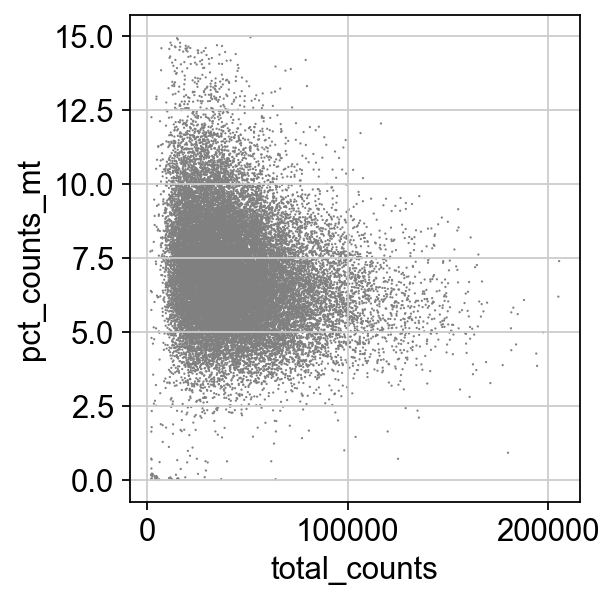

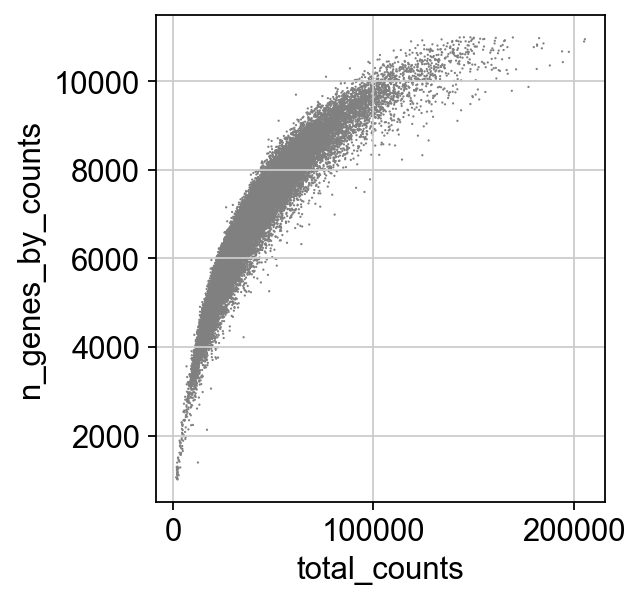

In [20]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt',)
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [21]:
adata.shape

(29348, 30213)

In [22]:
### remove ('hsa-miR-92a-3p', ['miR_1:TCACAAGTCGGCATAT-1']) from adata
cells_to_keep = [cell for cell in adata.obs.index.to_list() if cell != 'miR_1:TCACAAGTCGGCATAT-1']
adata = adata[cells_to_keep,:]

In [23]:
adata.shape

(29347, 30213)

In [24]:
### making all 20 control guides the same annotation
meta = adata.obs
meta = meta.astype({'guide':'string'})
meta.loc[meta.loc[:,'guide'] == 'NA', 'guide'] = 'TuD_NC'
meta = meta.astype({'guide':'category'})
adata.obs = meta
meta.dtypes

sample               category
barcode              category
guide                category
lor                   float64
pvalue                float64
adj_pvalue            float64
max_umi               float64
n_umi                 float64
m_umi                 float64
v_umi                 float64
log_max_umi           float64
log_n_umi             float64
log_m_umi             float64
n_genes                 int64
n_genes_by_counts       int32
total_counts          float32
total_counts_mt       float32
pct_counts_mt         float32
dtype: object

In [25]:
adata.obs

sample           barcode                      guide  \
miR_1:AAACCCAAGGAGAGGC-1  miR_1  AAACCCAAGGAGAGGC              miR-203a-3p.1   
miR_1:AAACCCAAGGTAAACT-1  miR_1  AAACCCAAGGTAAACT                  miR-93-3p   
miR_1:AAACCCACAACGATCT-1  miR_1  AAACCCACAACGATCT   miR-130-3p/301-3p/454-3p   
miR_1:AAACCCACACGATTCA-1  miR_1  AAACCCACACGATTCA                     TuD_NC   
miR_1:AAACCCACAGTCAACT-1  miR_1  AAACCCACAGTCAACT                   miR-147b   
...                         ...               ...                        ...   
miR_3:TTTGGTTTCGGACTTA-1  miR_3  TTTGGTTTCGGACTTA  miR-371b-5p/373-5p/616-5p   
miR_3:TTTGTTGCACGCGTGT-1  miR_3  TTTGTTGCACGCGTGT                 miR-361-5p   
miR_3:TTTGTTGCATAGATCC-1  miR_3  TTTGTTGCATAGATCC                   miR-1323   
miR_3:TTTGTTGGTCTAGTGT-1  miR_3  TTTGTTGGTCTAGTGT           miR-3940-5p/4507   
miR_3:TTTGTTGGTTTCCATT-1  miR_3  TTTGTTGGTTTCCATT           hsa-miR-10527-5p   

                               lor         pvalue     adj_pvalue  max_umi  \
miR_1:AAACCCAAGGAGAGGC-1  5.453121  2.983000e-159  3.010603e-152     67.0   
miR_1:AAACCCAAGGTAAACT-1  6.012001  3.907611e-225  3.943769e-218     97.0   
miR_1:AAACCCACAACGATCT-1  5.864701  3.299362e-202  3.329893e-195     89.0   
miR_1:AAACCCACACGATTCA-1  5.859895  2.574602e-201  2.598426e-194     96.0   
miR_1:AAACCCACAGTCAACT-1  5.632808  3.564463e-178  3.597446e-171     71.0   
...                            ...            ...            ...      ...   
miR_3:TTTGGTTTCGGACTTA-1  3.885564  8.005527e-277  6.410418e-270    129.0   
miR_3:TTTGTTGCACGCGTGT-1  0.506602   8.834341e-07   1.000000e+00      2.0   
miR_3:TTTGTTGCATAGATCC-1  6.603449  5.795787e-306  4.640971e-299    126.0   
miR_3:TTTGTTGGTCTAGTGT-1  2.402414  5.349572e-125  4.283664e-118     58.0   
miR_3:TTTGTTGGTTTCCATT-1  6.014592  4.169835e-209  3.338991e-202    101.0   

                          n_umi     m_umi      v_umi  log_max_umi  log_n_umi  \
miR_1:AAACCCAAGGAGAGGC-1   78.0  0.196474  11.324937     1.826075   1.892095   
miR_1:AAACCCAAGGTAAACT-1  108.0  0.272040  23.713686     1.986772   2.033424   
miR_1:AAACCCACAACGATCT-1  113.0  0.284635  19.981910     1.949390   2.053078   
miR_1:AAACCCACACGATTCA-1  114.0  0.287154  23.235516     1.982271   2.056905   
miR_1:AAACCCACAGTCAACT-1   86.0  0.216625  12.725683     1.851258   1.934498   
...                         ...       ...        ...          ...        ...   
miR_3:TTTGGTTTCGGACTTA-1  237.0  0.596977  44.983627     2.110590   2.374748   
miR_3:TTTGTTGCACGCGTGT-1   12.0  0.030227   0.034438     0.301030   1.079181   
miR_3:TTTGTTGCATAGATCC-1  159.0  0.400504  40.028586     2.100371   2.201397   
miR_3:TTTGTTGGTCTAGTGT-1  110.0  0.277078   9.251317     1.763428   2.041393   
miR_3:TTTGTTGGTTTCCATT-1  131.0  0.329975  25.736801     2.004321   2.117271   

                          log_m_umi  n_genes  n_genes_by_counts  total_counts  \
miR_1:AAACCCAAGGAGAGGC-1  -0.706696     6001               6001       33957.0   
miR_1:AAACCCAAGGTAAACT-1  -0.565367     6871               6870       31930.0   
miR_1:AAACCCACAACGATCT-1  -0.545712     7448               7448       42786.0   
miR_1:AAACCCACACGATTCA-1  -0.541886     8043               8042       58540.0   
miR_1:AAACCCACAGTCAACT-1  -0.664292     6582               6582       31581.0   
...                             ...      ...                ...           ...   
miR_3:TTTGGTTTCGGACTTA-1  -0.224042     5525               5525       25937.0   
miR_3:TTTGTTGCACGCGTGT-1  -1.519609     8828               8828       82117.0   
miR_3:TTTGTTGCATAGATCC-1  -0.397393     6431               6431       34834.0   
miR_3:TTTGTTGGTCTAGTGT-1  -0.557398     5103               5103       22318.0   
miR_3:TTTGTTGGTTTCCATT-1  -0.481519     5082               5082       19834.0   

                          total_counts_mt  pct_counts_mt  
miR_1:AAACCCAAGGAGAGGC-1           2912.0       8.575551  
miR_1:AAACCCAAGGTAAACT-1           2091.0       6.548700  
miR_1:AAACCCACAACGATCT-1    

In [26]:
### pertubation annotation to add to each cell
one_hot_df = pd.get_dummies(adata.obs["guide"])

In [27]:
one_hot_df

TuD_NC  hsa-miR-10399-3p  hsa-miR-10399-5p  \
miR_1:AAACCCAAGGAGAGGC-1       0                 0                 0   
miR_1:AAACCCAAGGTAAACT-1       0                 0                 0   
miR_1:AAACCCACAACGATCT-1       0                 0                 0   
miR_1:AAACCCACACGATTCA-1       1                 0                 0   
miR_1:AAACCCACAGTCAACT-1       0                 0                 0   
...                          ...               ...               ...   
miR_3:TTTGGTTTCGGACTTA-1       0                 0                 0   
miR_3:TTTGTTGCACGCGTGT-1       0                 0                 0   
miR_3:TTTGTTGCATAGATCC-1       0                 0                 0   
miR_3:TTTGTTGGTCTAGTGT-1       0                 0                 0   
miR_3:TTTGTTGGTTTCCATT-1       0                 0                 0   

                          hsa-miR-10401-3p  hsa-miR-10523-5p  \
miR_1:AAACCCAAGGAGAGGC-1                 0                 0   
miR_1:AAACCCAAGGTAAACT-1                 0                 0   
miR_1:AAACCCACAACGATCT-1                 0                 0   
miR_1:AAACCCACACGATTCA-1                 0                 0   
miR_1:AAACCCACAGTCAACT-1                 0                 0   
...                                    ...               ...   
miR_3:TTTGGTTTCGGACTTA-1                 0                 0   
miR_3:TTTGTTGCACGCGTGT-1                 0                 0   
miR_3:TTTGTTGCATAGATCC-1                 0                 0   
miR_3:TTTGTTGGTCTAGTGT-1                 0                 0   
miR_3:TTTGTTGGTTTCCATT-1                 0                 0   

                          hsa-miR-10526-3p  hsa-miR-10527-5p  hsa-miR-9903  \
miR_1:AAACCCAAGGAGAGGC-1                 0                 0             0   
miR_1:AAACCCAAGGTAAACT-1                 0                 0             0   
miR_1:AAACCCACAACGATCT-1                 0                 0             0   
miR_1:AAACCCACACGATTCA-1                 0                 0             0   
miR_1:AAACCCACAGTCAACT-1                 0                 0             0   
...                                    ...               ...           ...   
miR_3:TTTGGTTTCGGACTTA-1                 0                 0             0   
miR_3:TTTGTTGCACGCGTGT-1                 0                 0             0   
miR_3:TTTGTTGCATAGATCC-1                 0                 0             0   
miR_3:TTTGTTGGTCTAGTGT-1                 0                 0             0   
miR_3:TTTGTTGGTTTCCATT-1                 0                 1             0   

                          let-7-5p/98-5p  let-7a-2-3p/let-7g-3p  ...  \
miR_1:AAACCCAAGGAGAGGC-1               0                      0  ...   
miR_1:AAACCCAAGGTAAACT-1               0                      0  ...   
miR_1:AAACCCACAACGATCT-1               0                      0  ...   
miR_1:AAACCCACACGATTCA-1               0                      0  ...   
miR_1:AAACCCACAGTCAACT-1               0                      0  ...   
...                                  ...                    ...  ...   
miR_3:TTTGGTTTCGGACTTA-1               0                      0  ...   
miR_3:TTTGTTGCACGCGTGT-1               0                      0  ...   
miR_3:TTTGTTGCATAGATCC-1               0                      0  ...   
miR_3:TTTGTTGGTCTAGTGT-1               0                      0  ...   
miR_3:TTTGTTGGTTTCCATT-1               0                      0  ...   

                          miR-93-3p  miR-937-3p  miR-940/6808-5p/6893-5p  \
miR_1:AAACCCAAGGAGAGGC-1          0           0                        0   
miR_1:AAACCCAAGGTAAACT-1          1           0                        0   
miR_1:AAACCCACAACGATCT-1          0           0                        0   
miR_1:AAACCCACACGATTCA-1          0           0                        0   
miR_1:AAACCCACAGTCAACT-1          0           0                        0   
...                             ...         ...                      ...   
miR_3:TTTGGTTTCGGACTTA-1          0           0           

In [28]:
## add the gene annotation for the first layer
## the first layer is connected to the second in a way such that reflects pathways
## RBP_gene_df is the gene connections (first layer) to TFs (second layer) gmt file

In [2]:
import scipy.sparse as sp_sparse
import tables
from itertools import chain
from model import loss_function
from model import VAE
import numpy as np
import os
import pandas as pd
import torch
from gseapy import read_gmt
from datetime import datetime


In [30]:
miR_targets_annot = pd.read_csv('/home/ssobti/projects/mir_tud/uploaded_data/Predicted_Targets_Info.default_predictions.txt', sep='\t')

In [31]:
miR_targets_annot = miR_targets_annot.loc[:, ['miR Family', 'Gene Symbol']]
miR_targets_annot

miR Family Gene Symbol
0                                        miR-23-3p        A1BG
1                                           miR-23        A1BG
2                                        miR-23-3p        A1BG
3                                           miR-23        A1BG
4       miR-302-3p/372-3p/373/518-3p/519-3p/520-3p        A1CF
...                                            ...         ...
718228                                miR-1-3p/206        ZZZ3
718229                                miR-1-3p/206        ZZZ3
718230                                  miR-494-3p        ZZZ3
718231                                  miR-494-3p        ZZZ3
718232                                     miR-338        ZZZ3

[718233 rows x 2 columns]

In [32]:
miR_families = list(set(miR_targets_annot.loc[:,'miR Family']))

In [33]:
gmt_file = {}
for idx, miR_fam in enumerate(miR_families):
    targets = miR_targets_annot.loc[miR_fam == miR_targets_annot.loc[:, 'miR Family'], 'Gene Symbol']
    gmt_file[miR_fam] = list(targets)

In [34]:
### creating a matrix that links gene sets (columns) to master regulators (rows) via 0/1 annotation
gmt_file = pd.Series(gmt_file).str.join('|')
gmt_file = gmt_file.str.get_dummies()
gmt_file

A1BG  A1CF  A2M  A4GNT  AACS  AADACL3  \
miR-339-5p/3586-5p                      0     0    0      0     0        0   
miR-409                                 0     0    0      0     0        0   
miR-487b                                0     0    0      0     0        0   
miR-22                                  0     0    0      1     0        0   
miR-487-3p                              0     0    0      0     0        0   
...                                   ...   ...  ...    ...   ...      ...   
miR-154-3p/487                          0     0    0      0     0        0   
miR-25-3p/32-5p/92-3p/363-3p/367-3p     0     0    0      0     0        0   
miR-199-3p/3129                         0     0    0      0     0        0   
miR-299                                 0     0    0      0     0        0   
miR-140-3p                              0     0    0      0     0        0   

                                     AADAT  AAED1  AAGAB  AAK1  ...  ZWILCH  \
miR-339-5p/3586-5p                       0      0      0     0  ...       0   
miR-409                                  0      0      0     0  ...       0   
miR-487b                                 0      0      0     0  ...       0   
miR-22                                   0      0      0     0  ...       0   
miR-487-3p                               0      0      0     0  ...       0   
...                                    ...    ...    ...   ...  ...     ...   
miR-154-3p/487                           0      0      0     0  ...       0   
miR-25-3p/32-5p/92-3p/363-3p/367-3p      0      0      0     0  ...       0   
miR-199-3p/3129                          0      0      0     0  ...       0   
miR-299                                  0      0      0     0  ...       0   
miR-140-3p                               0      0      0     0  ...       0   

                                     ZXDA  ZXDB  ZXDC  ZYG11A  ZYG11B  ZYX  \
miR-339-5p/3586-5p                      0     0     0       0       0    0   
miR-409                                 0     0     0       0       0    0   
miR-487b                                0     0     0       0       0    0   
miR-22                                  0     0     0       0       0    0   
miR-487-3p                              0     0     0       0       0    0   
...                                   ...   ...   ...     ...     ...  ...   
miR-154-3p/487                          0     0     0       1       0    0   
miR-25-3p/32-5p/92-3p/363-3p/367-3p     0     0     0       0       0    0   
miR-199-3p/3129                         0     0     0       0       0    0   
miR-299                                 0     0     0       0       0    0   
miR-140-3p                              0     0     0       0       0    0   

                                     ZZEF1  ZZZ3  hsa-mir-1199  
miR-339-5p/3586-5p                       0     0             0  
miR-409                                  0     1             0  
miR-487b                                 0     0             0  
miR-22                                   0     0             0  
miR-487-3p                               0     0             0  
...                                    ...   ...           ...  
miR-154-3p/487                           0     0             0  
miR-25-3p/32-5p/92-3p/363-3p/367-3p      0     0             0  
miR-199-3p/3129                          0     0             0  
miR-299                                  0     0             0  
miR-140-3p                               0     0             0  

[580 rows x 13759 columns]

In [35]:
## remove genes not in intersection bw expression matrix and gene_set annotation df
a = set(gmt_file.columns.to_list())
b = set(adata.var.index.to_list())

intersecting_genes = list(a.intersection(b))
print('Genes in annotated gene sets', len(a))
print('Genes in expression matrix', len(b))
print('Union', len(a.union(b)))
print('Intersecting genes kept', len(a.intersection(b)))

adata = adata[:, intersecting_genes]
gmt_file = gmt_file.loc[:, intersecting_genes]

Genes in annotated gene sets 13759
Genes in expression matrix 30213
Union 31677
Intersecting genes kept 12295


In [36]:
gmtmat_df = gmt_file.transpose()
gmtmat_df

miR-339-5p/3586-5p  miR-409  miR-487b  miR-22  miR-487-3p  \
ACTB                       0        0         0       0           0   
IFT27                      0        0         0       0           0   
MDK                        0        0         0       0           0   
GNG12                      0        0         0       0           0   
CC2D1A                     0        0         0       0           0   
...                      ...      ...       ...     ...         ...   
HLF                        1        0         0       0           0   
CTNNA3                     0        0         0       0           0   
RAB6C                      0        0         0       0           0   
SERPINB1                   0        0         0       0           0   
TRIM41                     1        0         0       0           0   

          miR-25/92/363-3p/367  miR-204-5p/211  miR-369  miR-34/449  \
ACTB                         0               0        0           0   
IFT27                        0               0        0           0   
MDK                          0               0        0           0   
GNG12                        0               0        0           0   
CC2D1A                       0               0        0           0   
...                        ...             ...      ...         ...   
HLF                          0               0        1           0   
CTNNA3                       0               0        0           0   
RAB6C                        0               0        0           0   
SERPINB1                     0               0        0           0   
TRIM41                       0               1        0           1   

          miR-96/1271  ...  miR-365  miR-126-3p.2  miR-323a-3p  miR-9-5p  \
ACTB                0  ...        0             0            0         0   
IFT27               0  ...        0             0            0         0   
MDK                 0  ...        0             0            0         0   
GNG12               1  ...        0             0            0         0   
CC2D1A              0  ...        0             0            0         1   
...               ...  ...      ...           ...          ...       ...   
HLF                 0  ...        0             0            0         0   
CTNNA3              0  ...        0             0            0         0   
RAB6C               0  ...        0             0            0         0   
SERPINB1            0  ...        0             0            0         0   
TRIM41              0  ...        0             0            0         0   

          miR-208  miR-154-3p/487  miR-25-3p/32-5p/92-3p/363-3p/367-3p  \
ACTB            0               0                                    0   
IFT27           0               0                                    0   
MDK             0               0                                    0   
GNG12           0               0                                    0   
CC2D1A          0               0                                    0   
...           ...             ...                                  ...   
HLF             0               0                                    0   
CTNNA3          0               0                                    0   
RAB6C           0               0                                    0   
SERPINB1        0               0                                    0   
TRIM41          0               0                                    0   

          miR-199-3p/3129  miR-299  miR-140-3p  
ACTB                    0        0           0  
IFT27                   0        0           0  
MDK                     0        0           0  
GNG12                   0        0           0  
CC2D1A                  0        0           0  
...                   ...      ...         ...  
HLF                     0        0           1  
CTNNA3                  0        0           0  
RAB6C                   0        0           0  
SERPINB1    

In [37]:
gmtmat = gmtmat_df.to_numpy()
gmtmat

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [38]:
device='cpu'

In [39]:
gmttensor = torch.from_numpy(
            np.transpose(gmtmat)).to(device).long()
gmttensor

tensor([[0, 0, 0,  ..., 0, 0, 1],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])

In [40]:
## this function tells you how many paramters are in a model
def get_n_params(model):
    pp = 0
    for p in list(model.parameters()):
        nn = 1
        for s in list(p.size()):
            nn = nn * s
        pp += nn
    return pp

# Twin Model

In [41]:
import random
samps=random.sample(list(adata.obs.guide.unique()),2)
samps

['miR-128-1-5p', 'miR-942-3p']

In [42]:
adata.obs.index

Index(['miR_1:AAACCCAAGGAGAGGC-1', 'miR_1:AAACCCAAGGTAAACT-1',
       'miR_1:AAACCCACAACGATCT-1', 'miR_1:AAACCCACACGATTCA-1',
       'miR_1:AAACCCACAGTCAACT-1', 'miR_1:AAACCCACATCTCATT-1',
       'miR_1:AAACCCACATGTCGTA-1', 'miR_1:AAACCCACATTATGCG-1',
       'miR_1:AAACCCAGTCTAATCG-1', 'miR_1:AAACCCAGTTAATCGC-1',
       ...
       'miR_3:TTTGGTTAGGCGACAT-1', 'miR_3:TTTGGTTCAAAGGATT-1',
       'miR_3:TTTGGTTCAACGACTT-1', 'miR_3:TTTGGTTCATAGCTGT-1',
       'miR_3:TTTGGTTTCCTTACCG-1', 'miR_3:TTTGGTTTCGGACTTA-1',
       'miR_3:TTTGTTGCACGCGTGT-1', 'miR_3:TTTGTTGCATAGATCC-1',
       'miR_3:TTTGTTGGTCTAGTGT-1', 'miR_3:TTTGTTGGTTTCCATT-1'],
      dtype='object', length=29347)

In [43]:
ct_cbc_dict = {}
cbc_ct_dict = {}
for ct in list(adata.obs.guide.unique()):
    ct_cbc_dict[ct] = adata.obs.query(f'guide==\"{ct}\"').index.tolist()
    for cbc in ct_cbc_dict[ct]:
        cbc_ct_dict[cbc] = ct
list(ct_cbc_dict.items())[1]

('miR-93-3p',
 ['miR_1:AAACCCAAGGTAAACT-1',
  'miR_1:AAGTACCGTATCAGCT-1',
  'miR_1:AAGTCGTGTGTCATTG-1',
  'miR_1:ACCTGTCGTGTGTGGA-1',
  'miR_1:ACGTAACTCTCCAAGA-1',
  'miR_1:ACGTACAGTGTGTCGC-1',
  'miR_1:ACTTCCGAGTGATCGG-1',
  'miR_1:AGGTTACTCCGATAAC-1',
  'miR_1:ATTTCACCAGCGAACA-1',
  'miR_1:CACATGAGTCGACTTA-1',
  'miR_1:CACATGATCCGCAACG-1',
  'miR_1:CAGATACCACTAAACC-1',
  'miR_1:CAGCACGTCCATCTGC-1',
  'miR_1:CATGCCTGTCGAGTGA-1',
  'miR_1:CGTAATGCACAATGTC-1',
  'miR_1:CGTGATAAGAGAGGGC-1',
  'miR_1:CTAACCCAGGTTGACG-1',
  'miR_1:CTCATGCAGTAAGCAT-1',
  'miR_1:GACCCAGAGCATCAAA-1',
  'miR_1:GACCCTTTCGCTATTT-1',
  'miR_1:GGATCTAGTGTATACC-1',
  'miR_1:GGCTTGGCATCCCACT-1',
  'miR_1:GGTGATTGTGGATACG-1',
  'miR_1:GGTTGTACATCCTCAC-1',
  'miR_1:GTGAGTTTCGTGGCGT-1',
  'miR_1:GTGCTTCCAATTTCTC-1',
  'miR_1:GTTTACTGTATAGCTC-1',
  'miR_1:GTTTGGATCCCTGTTG-1',
  'miR_1:TATGTTCGTATGAAGT-1',
  'miR_1:TATTGCTCAATCGCAT-1',
  'miR_1:TATTTCGCAGTTACCA-1',
  'miR_1:TCTACATGTTTACGTG-1',
  'miR_1:TGTTCCGCAATTGCAC-

In [44]:
list(cbc_ct_dict.items())[1]

('miR_1:AATGGCTAGCGAAACC-1', 'miR-203a-3p.1')

In [45]:
adata.X.toarray().shape

(29347, 12295)

In [46]:
adata.var.shape

(12295, 7)

In [47]:
## this converts the expression matrix to a dictionary 
## where each cell/row of matrix is now a 'key' with associated gene expression values

cbc_arr_dict = {}
for cbc, arr in zip(adata.obs.index.tolist(), adata.X.toarray()):
    cbc_arr_dict[cbc] = arr.copy()
list(cbc_arr_dict.items())[1]

('miR_1:AAACCCAAGGTAAACT-1',
 array([67.,  0.,  0., ...,  0.,  4.,  0.], dtype=float32))

In [48]:
## this converts the cell barcode to guide annotation df to a dictionary 
one_hot_dict = one_hot_df.T.to_dict(orient='list')
list(one_hot_dict.keys())[0]

'miR_1:AAACCCAAGGAGAGGC-1'

In [49]:
import numpy as np
import random

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import torchvision
from torchvision import transforms

class tripletDataset(Dataset):
    def __init__(self, cbc_list, ct_list, ct_cbc_dict, cbc_ct_dict, cbc_arr_dict, one_hot_dict):
        self.cbc_list = cbc_list
        self.ct_list = ct_list
        self.ct_cbc_dict = ct_cbc_dict
        self.cbc_ct_dict = cbc_ct_dict
        self.cbc_arr_dict = cbc_arr_dict
        self.one_hot_dict = one_hot_dict
    
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        
        cbc_anchor = self.cbc_list[idx]
        ct_anchor = self.cbc_ct_dict[cbc_anchor]

        #for negative, pick two random cell types, in case the 1st one turned out to be the same as the anchor's cell type
        ct1, ct2 = random.sample(self.ct_list, 2) 
        ct_neg = ct1
        if ct1==ct_anchor:
            ct_neg = ct2
        
        #for positive, pick two cell barcodes, in case the 1st one turned out to be the anchor itself
        cbc1, cbc2 = random.sample(self.ct_cbc_dict[ct_anchor], 2)
        cbc_pos = cbc1
        if cbc1==cbc_anchor:
            cbc_pos = cbc2
        
        cbc_neg = random.choice(self.ct_cbc_dict[ct_neg])
        
        ohot_arr = np.array(self.one_hot_dict[cbc_anchor])
                
        return (torch.from_numpy(cbc_arr_dict[cbc_anchor].astype(np.float32)),
                torch.from_numpy(cbc_arr_dict[cbc_pos].astype(np.float32)),
                torch.from_numpy(cbc_arr_dict[cbc_neg].astype(np.float32)),
                torch.from_numpy(ohot_arr.astype(np.float32)), cbc_anchor, idx)
    
    def __len__(self):
        return len(self.cbc_list)


In [50]:
import random
import math

In [51]:
len(adata.obs.index.tolist())

29347

In [52]:
## only keep cells in data that's fed to DataLoader such that even number of cells across the guides
guide_list = set(list(cbc_ct_dict.values()))

In [53]:
counter_tbl = pd.DataFrame({'guide' : list(cbc_ct_dict.values())})
counter_tbl2 = pd.DataFrame({'guide' : counter_tbl['guide'].value_counts()})

(0.0, 250.0)

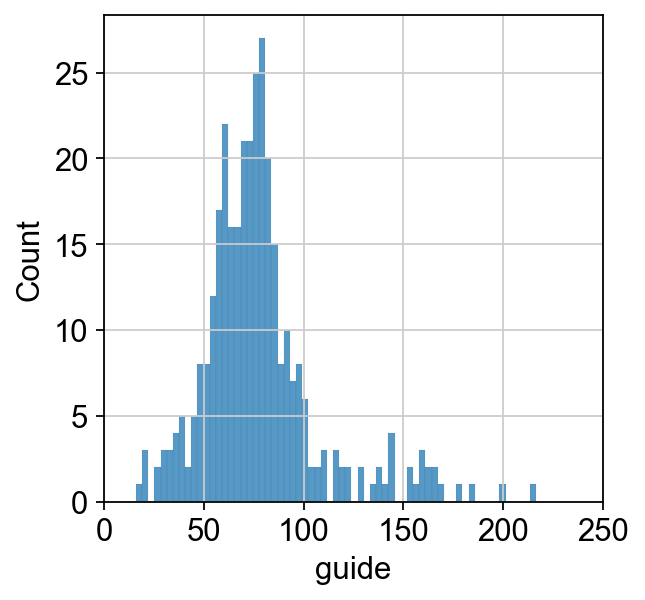

In [54]:
## note TuD_NC has 3000+ cells, x-axis is cut off here
import seaborn as sns
sns.histplot(data=counter_tbl2, x="guide", bins=1000).set_xlim(0,250)

In [55]:
counter_tbl['guide'].value_counts()[-1:-38:-1]

miR-19-3p                              16
miR-18-5p                              20
miR-3613-5p                            22
miR-103-3p/107                         22
miR-24-3p                              27
miR-21-5p/590-5p                       27
miR-221-3p/222-3p                      30
miR-636                                30
let-7-5p/98-5p                         30
miR-484/3155                           32
miR-1277-3p                            32
miR-26-5p                              33
miR-17-5p/20-5p/93-5p/106-5p/519-3p    35
miR-4707-3p                            36
miR-22-3p                              36
miR-27-3p                              37
miR-151-5p                             38
miR-4775                               38
miR-548l                               38
miR-6724-5p/6773-5p                    39
miR-1268a/1268b                        40
miR-3605-3p                            42
miR-29a-5p                             43
miR-149-5p                        

In [56]:
random.seed(5)
new = []
min_cell_cutoff = 30
[new.append(random.sample(ct_cbc_dict[val], min_cell_cutoff)) for idx, val in enumerate(guide_list) if counter_tbl['guide'].value_counts()[val] > (min_cell_cutoff-1)]
randomized_cbc_list = [item for sublist in new for item in sublist]
randomized_cbc_list[0:5]

['miR_2:CTGCATCTCGCAGAGA-1',
 'miR_2:TCGCTCAAGGAACTAT-1',
 'miR_3:AACGTCAGTTTCGTTT-1',
 'miR_2:TCAATTCTCTGACCCT-1',
 'miR_3:TATTGGGAGCGGTAGT-1']

In [57]:
test_cells = list(set(adata.obs.index.tolist()).difference(randomized_cbc_list))

In [58]:
len(randomized_cbc_list)

9900

In [59]:
def get_key(val, dictionary):
    for key, value in dictionary.items():
        if val in value:
            return key
 
    return "key doesn't exist"

In [60]:
ct_cbc_dict_edited = ct_cbc_dict.copy()

In [61]:
test_cells_set = set(test_cells)
for key, vals in ct_cbc_dict.items():
        ct_cbc_dict_edited[key] = list(set(vals).difference(test_cells_set))
        if len(ct_cbc_dict_edited[key]) == 0:
            del ct_cbc_dict_edited[key]

In [62]:
len(ct_cbc_dict_edited)

330

In [63]:
get_key(test_cells[0], ct_cbc_dict_edited) ## should not find a key since these cells should be deleted from the dictionary

"key doesn't exist"

In [64]:
cbc_ct_dict_edited = cbc_ct_dict.copy()

In [65]:
for key in cbc_ct_dict:
    if key in test_cells:
        del cbc_ct_dict_edited[key]

In [66]:
from itertools import islice
dict(islice(cbc_ct_dict.items(), 0, 2))

{'miR_1:AAACCCAAGGAGAGGC-1': 'miR-203a-3p.1',
 'miR_1:AATGGCTAGCGAAACC-1': 'miR-203a-3p.1'}

In [67]:
len(list(adata.obs.guide.unique()))

336

In [68]:
len(set(cbc_ct_dict_edited.values()))

330

In [69]:
one_hot_df_miR_order = list(set(cbc_ct_dict_edited.values()))

In [70]:
cbc_arr_dict_edited = cbc_arr_dict.copy()

In [71]:
for key in cbc_arr_dict:
    if key in test_cells:
        del cbc_arr_dict_edited[key]

In [72]:
one_hot_df_edited = one_hot_df.copy()

In [73]:
one_hot_df_edited = one_hot_df_edited.loc[:, one_hot_df_miR_order]

In [74]:
one_hot_dict_prepped = one_hot_df_edited.T.to_dict(orient='list')
list(one_hot_dict_prepped.keys())[0]

'miR_1:AAACCCAAGGAGAGGC-1'

In [75]:
one_hot_dict_edited = one_hot_dict_prepped.copy()

In [76]:
len(one_hot_dict_edited)

29347

In [77]:
for key in one_hot_dict_prepped:
    if key in test_cells:
        del one_hot_dict_edited[key]

In [78]:
len(one_hot_dict_edited)

9900

In [79]:
len(list(one_hot_dict_edited.values())[0])

330

In [80]:
size_of_batch = 1800

In [81]:
triplet_loader = DataLoader(tripletDataset(randomized_cbc_list, list(set(cbc_ct_dict_edited.values())), ct_cbc_dict_edited, cbc_ct_dict_edited, cbc_arr_dict_edited, one_hot_dict_edited), batch_size=size_of_batch, shuffle=True)

In [82]:
comparison_array = adata[randomized_cbc_list,:].X.toarray()

In [83]:
comparison_array.shape

(9900, 12295)

In [84]:
comparison_array

array([[1., 1., 1., ..., 1., 3., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 2., 0.],
       [0., 0., 2., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [85]:
adata.X.toarray().shape[0]

29347

In [86]:
int(comparison_array.shape[0] / triplet_loader.batch_size)

5

In [87]:
numlvs = 10
vae = VAE(adata.shape[1],  # num genes
              gmttensor, #gmttensor
              len(set(adata[randomized_cbc_list,:].obs["guide"])), #number of cell types
              0,  # batch
              0,  # labels
              gmtmat.shape[1],  # hiddensize
              numlvs)

n_params = get_n_params(vae)
print("VAE has {} parameters".format(n_params))
vae.to(device)

VAE has 35732112 parameters


VAE(
  (z_encoder): Encoder(
    (encoder): FCLayersEncoder(
      (fc_layers): Sequential(
        (Layer_0): Sequential(
          (0): CustomConnected()
          (1): BatchNorm1d(580, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): None
          (3): ReLU()
          (4): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (mean_encoder): Linear(in_features=580, out_features=10, bias=True)
    (var_encoder): Linear(in_features=580, out_features=10, bias=True)
  )
  (ctpred_linear): Linear(in_features=10, out_features=330, bias=True)
  (ctpred_activation): ReLU()
  (l_encoder): Encoder(
    (encoder): FCLayersEncoder(
      (fc_layers): Sequential(
        (Layer_0): Sequential(
          (0): CustomConnected()
          (1): BatchNorm1d(580, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): None
          (3): ReLU()
          (4): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (mean_encoder): Linear(in

In [88]:
optimizer = torch.optim.Adam(
        vae.parameters(), lr=0.002)

SAMPLE_IDXS = adata.shape[0]

In [89]:
MINIBATCH = size_of_batch
MAXEPOCH = 400
loss_scalers = [10000, 1, 1, 1] #[recon_loss, KLD_loss, classification_loss, triplet_loss]
predict_celltypes = True
num_celltypes = len(set(cbc_ct_dict_edited.values()))
from scipy.stats import pearsonr
arrayed_data = adata[randomized_cbc_list,:].X.toarray()
R_tbl = pd.DataFrame(0, index=range(MAXEPOCH), columns=range(adata[randomized_cbc_list,:].shape[0]))

def train_model(vae, optimizer, data_loader, MAXEPOCH, expar, logdir,
                modelpath, chkpath, loss_scalers, predict_celltypes):
    criterion_class = torch.nn.CrossEntropyLoss()
    time_str = str(datetime.now())
    time_str = time_str.replace(" ", "_")
    time_str = time_str.replace(":", "0")
    logpath = os.path.join(
        logdir,
        "training.log.{}".format(time_str))
    loglink = open(logpath, "w")
    header = ["Epoch", "Training.Loss", "Recon_Loss", "KLD_Loss", "Classification_Loss", "Triplet_Loss", "MiniBatch.ID", "Time.Stamp"]
    loglink.write("\t".join(header) + "\n")
    loglink.close()
    TOTBATCHIDX = int(expar.shape[0] / data_loader.batch_size)
    
    for epoch in range(MAXEPOCH):
        running_loss = 0
        for idxbatch, batch in enumerate(data_loader):
            anchor, pos, neg, ohot, barcds, ids = [x.to(device).float() if ind < 4 else x for ind,x in enumerate(batch)]
            local_l_mean = np.mean(
                np.apply_along_axis(
                    np.sum, 1, anchor.detach().numpy()))
            local_l_var = np.var(
                np.apply_along_axis(
                    np.sum, 1, anchor.detach().numpy()))
            outdict_anchor = vae(anchor)
            outdict_pos = vae(pos)
            outdict_neg = vae(neg)

            ct_pred = outdict_anchor["ctpred"]
            loss_1, loss_2 = loss_function(
                outdict_anchor['qz_m'], outdict_anchor['qz_v'], anchor,
                outdict_anchor['px_rate'], outdict_anchor['px_r'],
                outdict_anchor['px_dropout'], outdict_anchor['ql_m'],
                outdict_anchor['ql_v'], True,
                local_l_mean, local_l_var)
            reconst = outdict_anchor['px_scale'].cpu().detach().numpy()
            Rs = []
            arrayed_data_ordered = arrayed_data[ids.tolist(),:]
            for i in range(len(reconst)):
                Rs.append(pearsonr(arrayed_data_ordered[i,:], reconst[i,:])[0])
            R_tbl.iloc[epoch, ids.tolist()] = Rs
            loss_1 = torch.mean(loss_1)
            loss_2 = torch.mean(loss_2)
            optimizer.zero_grad()
            if predict_celltypes:
                one_hot_temp = torch.max(ohot, 1)[1].to(device).long()
                loss_3 = criterion_class(ct_pred, one_hot_temp)
            else:
                loss_3 = 0

            distance_positive = (outdict_anchor['qz_m'] - outdict_pos['qz_m']).pow(2).sum(1)  # .pow(.5)
            distance_negative = (outdict_anchor['qz_m'] - outdict_neg['qz_m']).pow(2).sum(1)  # .pow(.5)
            losses = F.relu(distance_positive - distance_negative + 1.0)
            loss_4 = losses.mean()

            if idxbatch == 0:
                print(loss_1, loss_2, loss_3, loss_4)
            if idxbatch == -1 and epoch % 25 == 0:
                loss_scalers = np.array(
                    [loss_1.detach().cpu().numpy(),
                     loss_2.detach().cpu().numpy(),
                     loss_3.detach().cpu().numpy()])
                if np.min(loss_scalers) < 0:
                    if loss_2 < 0:
                        loss_2 = loss_2 * -1
                    else:
                        raise ValueError("One of the losses are negative")
                    print(loss_1)
                    print(loss_2)
                    print(loss_3)
                loss_scalers = loss_scalers / np.min(loss_scalers)
            loss = (loss_1 / torch.tensor(loss_scalers[0])) + (
                loss_2 / torch.tensor(loss_scalers[1])) + (
                loss_3 / torch.tensor(loss_scalers[2])) + (
                loss_4 / torch.tensor(loss_scalers[3]))
            if idxbatch == 0:
                print(loss)
            if torch.isnan(loss):
                print("Losses: {} {} {}".format(loss_1, loss_2, loss_3, loss_4))
                raise ValueError("NA occured in loss")
            # print(loss)
            loss.backward()
            optimizer.step()
            running_loss += loss
            del anchor, pos, neg, outdict_anchor, outdict_pos, outdict_neg
            # del one_hot_temp
            torch.cuda.empty_cache()
        cur_loss = running_loss / TOTBATCHIDX
        print("Epoch {}, Loss {} ({} {} {} {}) at {}".format(
            epoch, cur_loss.item(), loss_1, loss_2, loss_3, loss_4, datetime.now()))

        with open(logpath, "a+") as loglink:
            adlist = [str(epoch), str(cur_loss.item()), str(loss_1), str(loss_2), str(loss_3), str(loss_4),
                      str(idxbatch), str(datetime.now())]
            loglink.write("\t".join(adlist) + "\n")
        if epoch % 50 == 0:
            checkpoint = {
                'model': vae.state_dict(),
                'optimizer': optimizer.state_dict()
            }
            for eachpath in [modelpath, chkpath]:
                torch.save(checkpoint, eachpath)
    return vae

In [90]:
## this model was run separately as a separate notebook in the background which ended at this cell  
## To reload it, the data structure skeleton of the model has to be rebuilt by running the MAXEPOCH at ~ 1 or 2
## in order for you to be able to load the model trained for 400 epochs
vae = train_model(
                vae, optimizer, triplet_loader, MAXEPOCH,
                adata[randomized_cbc_list,:].X.toarray(), '/home/ssobti/projects/mir_tud/output_data/mave_output/Classification_model_R10000_K1_C1_T1/logs',
                '/home/ssobti/projects/mir_tud/output_data/mave_output/Classification_model_R10000_K1_C1_T1/models/model.pt', '/home/ssobti/projects/mir_tud/output_data/mave_output/Classification_model_R10000_K1_C1_T1/ckpt/ckpt.pt',
                loss_scalers, predict_celltypes)

tensor(25495.2949, grad_fn=<MeanBackward0>) tensor(0.8970, grad_fn=<MeanBackward0>) tensor(5.8142, grad_fn=<NllLossBackward0>) tensor(1.1447, grad_fn=<MeanBackward0>)
tensor(10.4054, grad_fn=<AddBackward0>)
Epoch 0, Loss 11.33084774017334 (15654.177734375 0.5541097521781921 5.814148902893066 1.0057332515716553) at 2023-02-19 16:09:22.732033
tensor(15667.1025, grad_fn=<MeanBackward0>) tensor(0.5092, grad_fn=<MeanBackward0>) tensor(5.8105, grad_fn=<NllLossBackward0>) tensor(1.0141, grad_fn=<MeanBackward0>)
tensor(8.9005, grad_fn=<AddBackward0>)
Epoch 1, Loss 10.5936918258667 (15370.9453125 0.4123123288154602 5.803527355194092 1.0235835313796997) at 2023-02-19 16:09:43.248844
tensor(15208.3818, grad_fn=<MeanBackward0>) tensor(0.3965, grad_fn=<MeanBackward0>) tensor(5.8050, grad_fn=<NllLossBackward0>) tensor(0.9988, grad_fn=<MeanBackward0>)
tensor(8.7212, grad_fn=<AddBackward0>)


KeyboardInterrupt: 

In [41]:
### save R_tbl
R_tbl.to_csv('/home/ssobti/projects/mir_tud/output_data/mave_output/Classification_model_R10000_K1_C1_T1/R_tbl.csv')

In [37]:
### load in objects from MAVE_trial_pt1 second attempt
#vae.load_state_dict(torch.load('/home/ssobti/projects/mir_tud/output_data/mave_output/MAVE_trial_R10000_K1_C1_T10000/models/model.pt')['model'])

<All keys matched successfully>

In [38]:
vae

VAE(
  (z_encoder): Encoder(
    (encoder): FCLayersEncoder(
      (fc_layers): Sequential(
        (Layer_0): Sequential(
          (0): CustomConnected()
          (1): BatchNorm1d(3725, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): None
          (3): ReLU()
          (4): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (mean_encoder): Linear(in_features=3725, out_features=10, bias=True)
    (var_encoder): Linear(in_features=3725, out_features=10, bias=True)
  )
  (ctpred_linear): Linear(in_features=10, out_features=377, bias=True)
  (ctpred_activation): ReLU()
  (l_encoder): Encoder(
    (encoder): FCLayersEncoder(
      (fc_layers): Sequential(
        (Layer_0): Sequential(
          (0): CustomConnected()
          (1): BatchNorm1d(3725, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): None
          (3): ReLU()
          (4): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (mean_encoder): Linea

In [39]:
adata.var.shape

(19073, 7)

In [40]:
vae.z_encoder.encoder.connections.sum(axis=1)

tensor([1035,  989,  933,  ...,   75,   86,  161])

In [41]:
vae.z_encoder.encoder.fc_layers.Layer_0[0].bias

Parameter containing:
tensor([ 0.0641, -0.0544,  0.0967,  ..., -0.0149, -0.0345,  0.0837],
       requires_grad=True)

In [47]:
def apply_model(vae, expar, numlvs, MINIBATCH):
    tf_activation = None
    weight_arr = torch.mul(
         vae.z_encoder.encoder.fc_layers.Layer_0[0].weights,
         vae.z_encoder.encoder.connections).detach().cpu().numpy()
    bias_arr = vae.z_encoder.encoder.fc_layers.Layer_0[0].bias.detach().cpu().numpy()
    reconst = np.zeros(expar.shape)
    mumat = np.zeros((expar.shape[0], numlvs))
    logvarmat = np.zeros((expar.shape[0], numlvs))
    TOTBATCHIDX = int(expar.shape[0] / MINIBATCH)
    for idxbatch in range(TOTBATCHIDX):
        idxbatch_st = idxbatch * MINIBATCH
        idxbatch_end = (idxbatch + 1) * MINIBATCH
        train1 = torch.from_numpy(
            expar[idxbatch_st:idxbatch_end, :]).to(device).float()
        outdict = vae(train1)
        reconst[idxbatch_st:idxbatch_end, :] = \
            outdict["px_scale"].cpu().detach().numpy()
        mumat[idxbatch_st:idxbatch_end, :] = \
            outdict["qz_m"].cpu().detach().numpy()
        logvarmat[idxbatch_st:idxbatch_end, :] = \
            outdict["qz_v"].cpu().detach().numpy()
        if idxbatch % 100 == 0:
            print("Applied on {}/{}".format(idxbatch, TOTBATCHIDX))
    # Multiply the expar with weight_arr
    tf_activation = np.matmul(
         expar, np.transpose(weight_arr))
    tf_activation = tf_activation + bias_arr
    return reconst, mumat, logvarmat, tf_activation

In [54]:
!head /home/ssobti/projects/mir_tud/output_data/mave_output/MAVE_trial/logs/training.log.2022-11-12_12057027.684701

Epoch	Training.Loss	MiniBatch.ID	Time.Stamp
0	525.4241333007812	0	2022-11-12 12:59:49.284178
1	1021.6984252929688	0	2022-11-12 13:02:10.941423
2	474.832275390625	0	2022-11-12 13:04:26.251501
3	636.82421875	0	2022-11-12 13:06:39.964366
4	782.2801513671875	0	2022-11-12 13:08:48.963039
5	602.1602783203125	0	2022-11-12 13:11:01.573759
6	447.08795166015625	0	2022-11-12 13:13:22.739848
7	450.6944580078125	0	2022-11-12 13:15:46.826769
8	534.76806640625	0	2022-11-12 13:18:05.744414


In [55]:
!tail -n 25 /home/ssobti/projects/mir_tud/output_data/mave_output/MAVE_trial/logs/training.log.2022-11-12_12057027.684701

375	326.8647155761719	0	2022-11-13 03:13:56.224360
376	327.41632080078125	0	2022-11-13 03:16:34.018736
377	327.15545654296875	0	2022-11-13 03:19:08.833403
378	326.12237548828125	0	2022-11-13 03:21:39.753556
379	325.602294921875	0	2022-11-13 03:24:13.402524
380	325.95880126953125	0	2022-11-13 03:26:44.972547
381	325.96697998046875	0	2022-11-13 03:29:15.709825
382	325.6365966796875	0	2022-11-13 03:31:48.433636
383	326.2365417480469	0	2022-11-13 03:34:26.069724
384	325.9718017578125	0	2022-11-13 03:36:59.526903
385	325.8126220703125	0	2022-11-13 03:39:31.527303
386	326.37152099609375	0	2022-11-13 03:42:00.706871
387	326.6508483886719	0	2022-11-13 03:44:34.702929
388	325.91131591796875	0	2022-11-13 03:47:09.517749
389	326.04412841796875	0	2022-11-13 03:49:46.707770
390	325.6563720703125	0	2022-11-13 03:52:18.299970
391	325.0895080566406	0	2022-11-13 03:54:51.320428
392	325.19879150390625	0	2022-11-13 03:57:26.293617
393	325.0986328125	0	2022-11-13 03:59:59.491863
394	326.3658752441406	0	20

In [44]:
reconst, mumat, logvarmat, rbp_act = apply_model(
                vae, adata[randomized_cbc_list,:].X.toarray(), numlvs, MINIBATCH)

Applied on 0/16


In [45]:
reconst

array([[3.79501103e-07, 6.54121141e-06, 1.75205116e-06, ...,
        3.38003451e-06, 2.11079282e-06, 1.76305491e-06],
       [3.83168356e-07, 6.58037379e-06, 1.73771912e-06, ...,
        3.39929511e-06, 2.10630492e-06, 1.77209904e-06],
       [3.77079431e-07, 6.55591521e-06, 1.74181605e-06, ...,
        3.39339795e-06, 2.11954421e-06, 1.77541165e-06],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [46]:
reconst.shape

(29147, 19073)

In [47]:
adata.X.toarray().shape

(29147, 19073)

In [48]:
from scipy.stats import pearsonr
Rs = []
arrayed_data = adata[randomized_cbc_list,:].X.toarray()
for i in range(len(reconst)):
    Rs.append(pearsonr(arrayed_data[i,:], reconst[i,:])[0])

/home/ssobti/miniconda3/envs/mave/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [49]:
pearsonr(adata[randomized_cbc_list,:].X.toarray()[i,:], reconst[i,:])

PearsonRResult(statistic=nan, pvalue=nan)

/tmp/ipykernel_3661946/1290921204.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Rs)


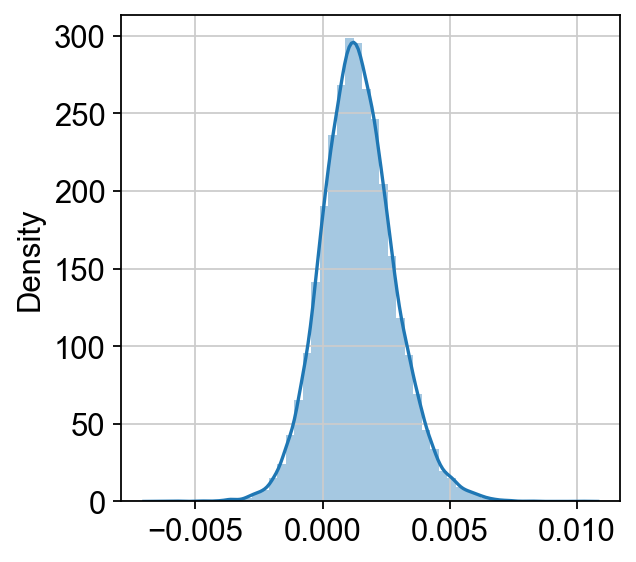

In [50]:
import umap
import seaborn as sns
from matplotlib import pyplot as plt
sns.distplot(Rs)
plt.savefig("/home/ssobti/projects/mir_tud/output_data/mave_output/Classification_model_R10000_K1_C1_T1/recons_Rs.pdf")

In [51]:
from scipy.stats import spearmanr
Rhos = []
for i in range(len(reconst)):
    Rhos.append(spearmanr(arrayed_data[i,:], reconst[i,:])[0])

KeyboardInterrupt: 

In [ ]:
sns.distplot(Rhos)

In [ ]:
mudf = pd.DataFrame(mumat)
mudf.columns = ["LV.mu.{}".format(each)
                            for each in range(numlvs)]

mudf.index = np.array(adata[randomized_cbc_list,:].obs.index, dtype="|U64")
mudf.head()

In [ ]:
mudf.to_csv("/home/ssobti/projects/mir_tud/output_data/mave_output/Classification_model_R10000_K1_C1_T1/scMAVE_mu-matrix.tsv.gz",
                compression="gzip", sep="\t")

In [ ]:
mumat = np.array(mudf.iloc[:, :numlvs])
reducer = umap.UMAP(n_neighbors=10, min_dist=0.45)
embedding = reducer.fit_transform(mumat)
umap_output = pd.DataFrame(embedding)
umap_output.columns = ["UMAP1", "UMAP2"]
umap_output["guide"] = list(adata[randomized_cbc_list,:].obs["guide"])
umap_output.index = mudf.index
umap_output.head()

In [ ]:
umap_output.to_csv("/home/ssobti/projects/mir_tud/output_data/mave_output/Classification_model_R10000_K1_C1_T1/UMAP-OF-MU.tsv.gz",sep="\t", compression="gzip")

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

umap_output = pd.read_csv("/home/ssobti/projects/mir_tud/output_data/mave_output/Classification_model_R10000_K1_C1_T1/UMAP-OF-MU.tsv.gz", sep = '\t')
umap_output

In [ ]:
umap_output['status'] = np.where(umap_output.guide=="TuD_NC", 1, 0)
sns_plot = sns.relplot(
    x="UMAP1", y="UMAP2", hue="status", data=umap_output,
    height=6, aspect=1.5)

In [78]:
import shap
from torch import nn

class VaePredictor(nn.Module):
    def __init__(self, net):
        '''
        Assumes 0:idx_onc are oncRNA matrix
        Assumes idx_onc:idx_sm are smRNA matrix
        assumes idx_sm: are batch
        '''
        super().__init__()
        self.net = net
        self.softmax = nn.Softmax(dim=1)
    def forward(self, x):
        # this assumes x has multiple types of data in it
        # and it's manually subsetting it here
        # you can remove reference to idx_onnc and idx_sm
        # if that's not the case
        outdict = self.net(x)
        ct_pred = self.softmax(outdict["ctpred"])
        return ct_pred
        

In [ ]:
import random
random.seed(55)
barcodes_picked = random.sample(randomized_cbc_list, 100)
dict_curr = {'genes': adata.var_names, 'expar': adata[barcodes_picked,:].X.toarray(), 'cell_guide': adata.obs.loc[barcodes_picked,]['guide']}

In [140]:
%%capture
dict_out = {}
feature_names = adata.var_names
expar_all = adata[barcodes_picked,:].X.toarray()
cell_guide = adata.obs.loc[barcodes_picked,]['guide']
tensor_expar_all = torch.from_numpy(expar_all).to(device).float()
# max in memory; 128
modelForShap = VaePredictor(vae)
shapExplainer = shap.DeepExplainer(modelForShap, tensor_expar_all)
shap_values = shapExplainer.shap_values(tensor_expar_all)
dict_out["Shap.values"] = shap_values
dict_out["Input"] = expar_all
dict_out["feature_names"] = feature_names
dict_out["barcodes_chosen"] = barcodes_picked
dict_out["sample_names"] = cell_guide
dict_out["shap_sums"] = np.sum(np.abs(shap_values[1]), axis=0) 
dict_out["summary_plot1"] = shap.summary_plot(shap_values, tensor_expar_all.detach().cpu().numpy(), feature_names, max_display=300)
feature_order = np.argsort(np.sum(np.abs(shap_values[1]), axis=0))
top_features = np.array(feature_names)[feature_order[::-1][:10]]
dict_out["top_10"] = top_features
dict_out["expected_values"] = shapExplainer.expected_value
del shapExplainer
torch.cuda.empty_cache()

In [ ]:
shap.summary_plot(shap_values, tensor_expar_all.detach().cpu().numpy(), feature_names, max_display=300)

In [87]:
mkshift = cbc_ct_dict.copy()

In [89]:
keepers = list(set(adata.obs.guide.unique()).difference(set(cbc_ct_dict_edited.values())))
for key, vals in cbc_ct_dict.items():
    if vals in keepers:
        del mkshift[key]

In [93]:
len(mkshift)

29213

In [95]:
## must make sure test_cells are only from the miR types the model was inputted with
edited_test_cells = list(mkshift.keys())

In [60]:
test_cell_data = torch.from_numpy(adata[edited_test_cells,:].X.toarray()).to('cpu').float()

NameError: name 'test_cells' is not defined

In [180]:
from torch import nn
maxer = nn.Softmax(dim=1)

max_positions = []
preds = maxer(vae(test_cell_data)['ctpred'])
for idx, pred in enumerate(preds):
    max_positions.append(int(np.where(pred.cpu().detach().numpy() == max(pred).cpu().detach().numpy())[0]))


In [181]:
test_predictions = [one_hot_df_edited.columns.tolist()[cell] for cell in max_positions]

In [59]:
actual_test_guides = list(adata[edited_test_cells,:].obs["guide"])

NameError: name 'test_cells' is not defined

In [ ]:
len([i for i, j in zip(test_predictions, actual_test_guides) if i == j])/len(test_predictions)

In [ ]:
filenm = '/home/ssobti/projects/mir_tud/output_data/mave_output/Classification_model_R10000_K1_C1_T1/shap_output_and_selected_cells.out'
my_shelf = shelve.open(filenm,'n') # 'n' for new
vec = ['randomized_cbc_list', 'edited_test_cells', 'test_cells', 'test_predictions', 'actual_test_guides', 'dict_out', 'one_hot_df_miR_order'] ## put objects you want to save in quotes separated by commas
for key in vec:
    try:
        my_shelf[key] = globals()[key]
    except TypeError:
        #
        # __builtins__, my_shelf, and imported modules can not be shelved.
        #
        print('ERROR shelving: {0}'.format(key))
    except pickle.PicklingError:
        print('ERROR shelving: {0}'.format(key))
    except KeyError:
        print('ERROR shelving: {0}'.format(key))
my_shelf.close()

In [ ]:
merged = mudf.merge(adata[randomized_cbc_list,:].obs[["guide"]], left_index=True, right_index=True).groupby(["guide"]).median()
merged.head()

In [73]:
merged.loc["TuD_NC", ]

LV.mu.0   -0.247475
LV.mu.1    0.257908
LV.mu.2    0.226938
LV.mu.3    0.265386
LV.mu.4   -0.248406
LV.mu.5    0.280568
LV.mu.6   -0.057928
LV.mu.7   -0.177641
LV.mu.8    0.275506
LV.mu.9    0.299553
Name: TuD_NC_01, dtype: float64

In [74]:
#set negative as origin
merged = merged - merged.loc["TuD_NC", ]
merged.drop("TuD_NC", axis=0, inplace=True)

/home/ssobti/miniconda3/envs/mave/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/ssobti/miniconda3/envs/mave/lib/python3.10/site-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


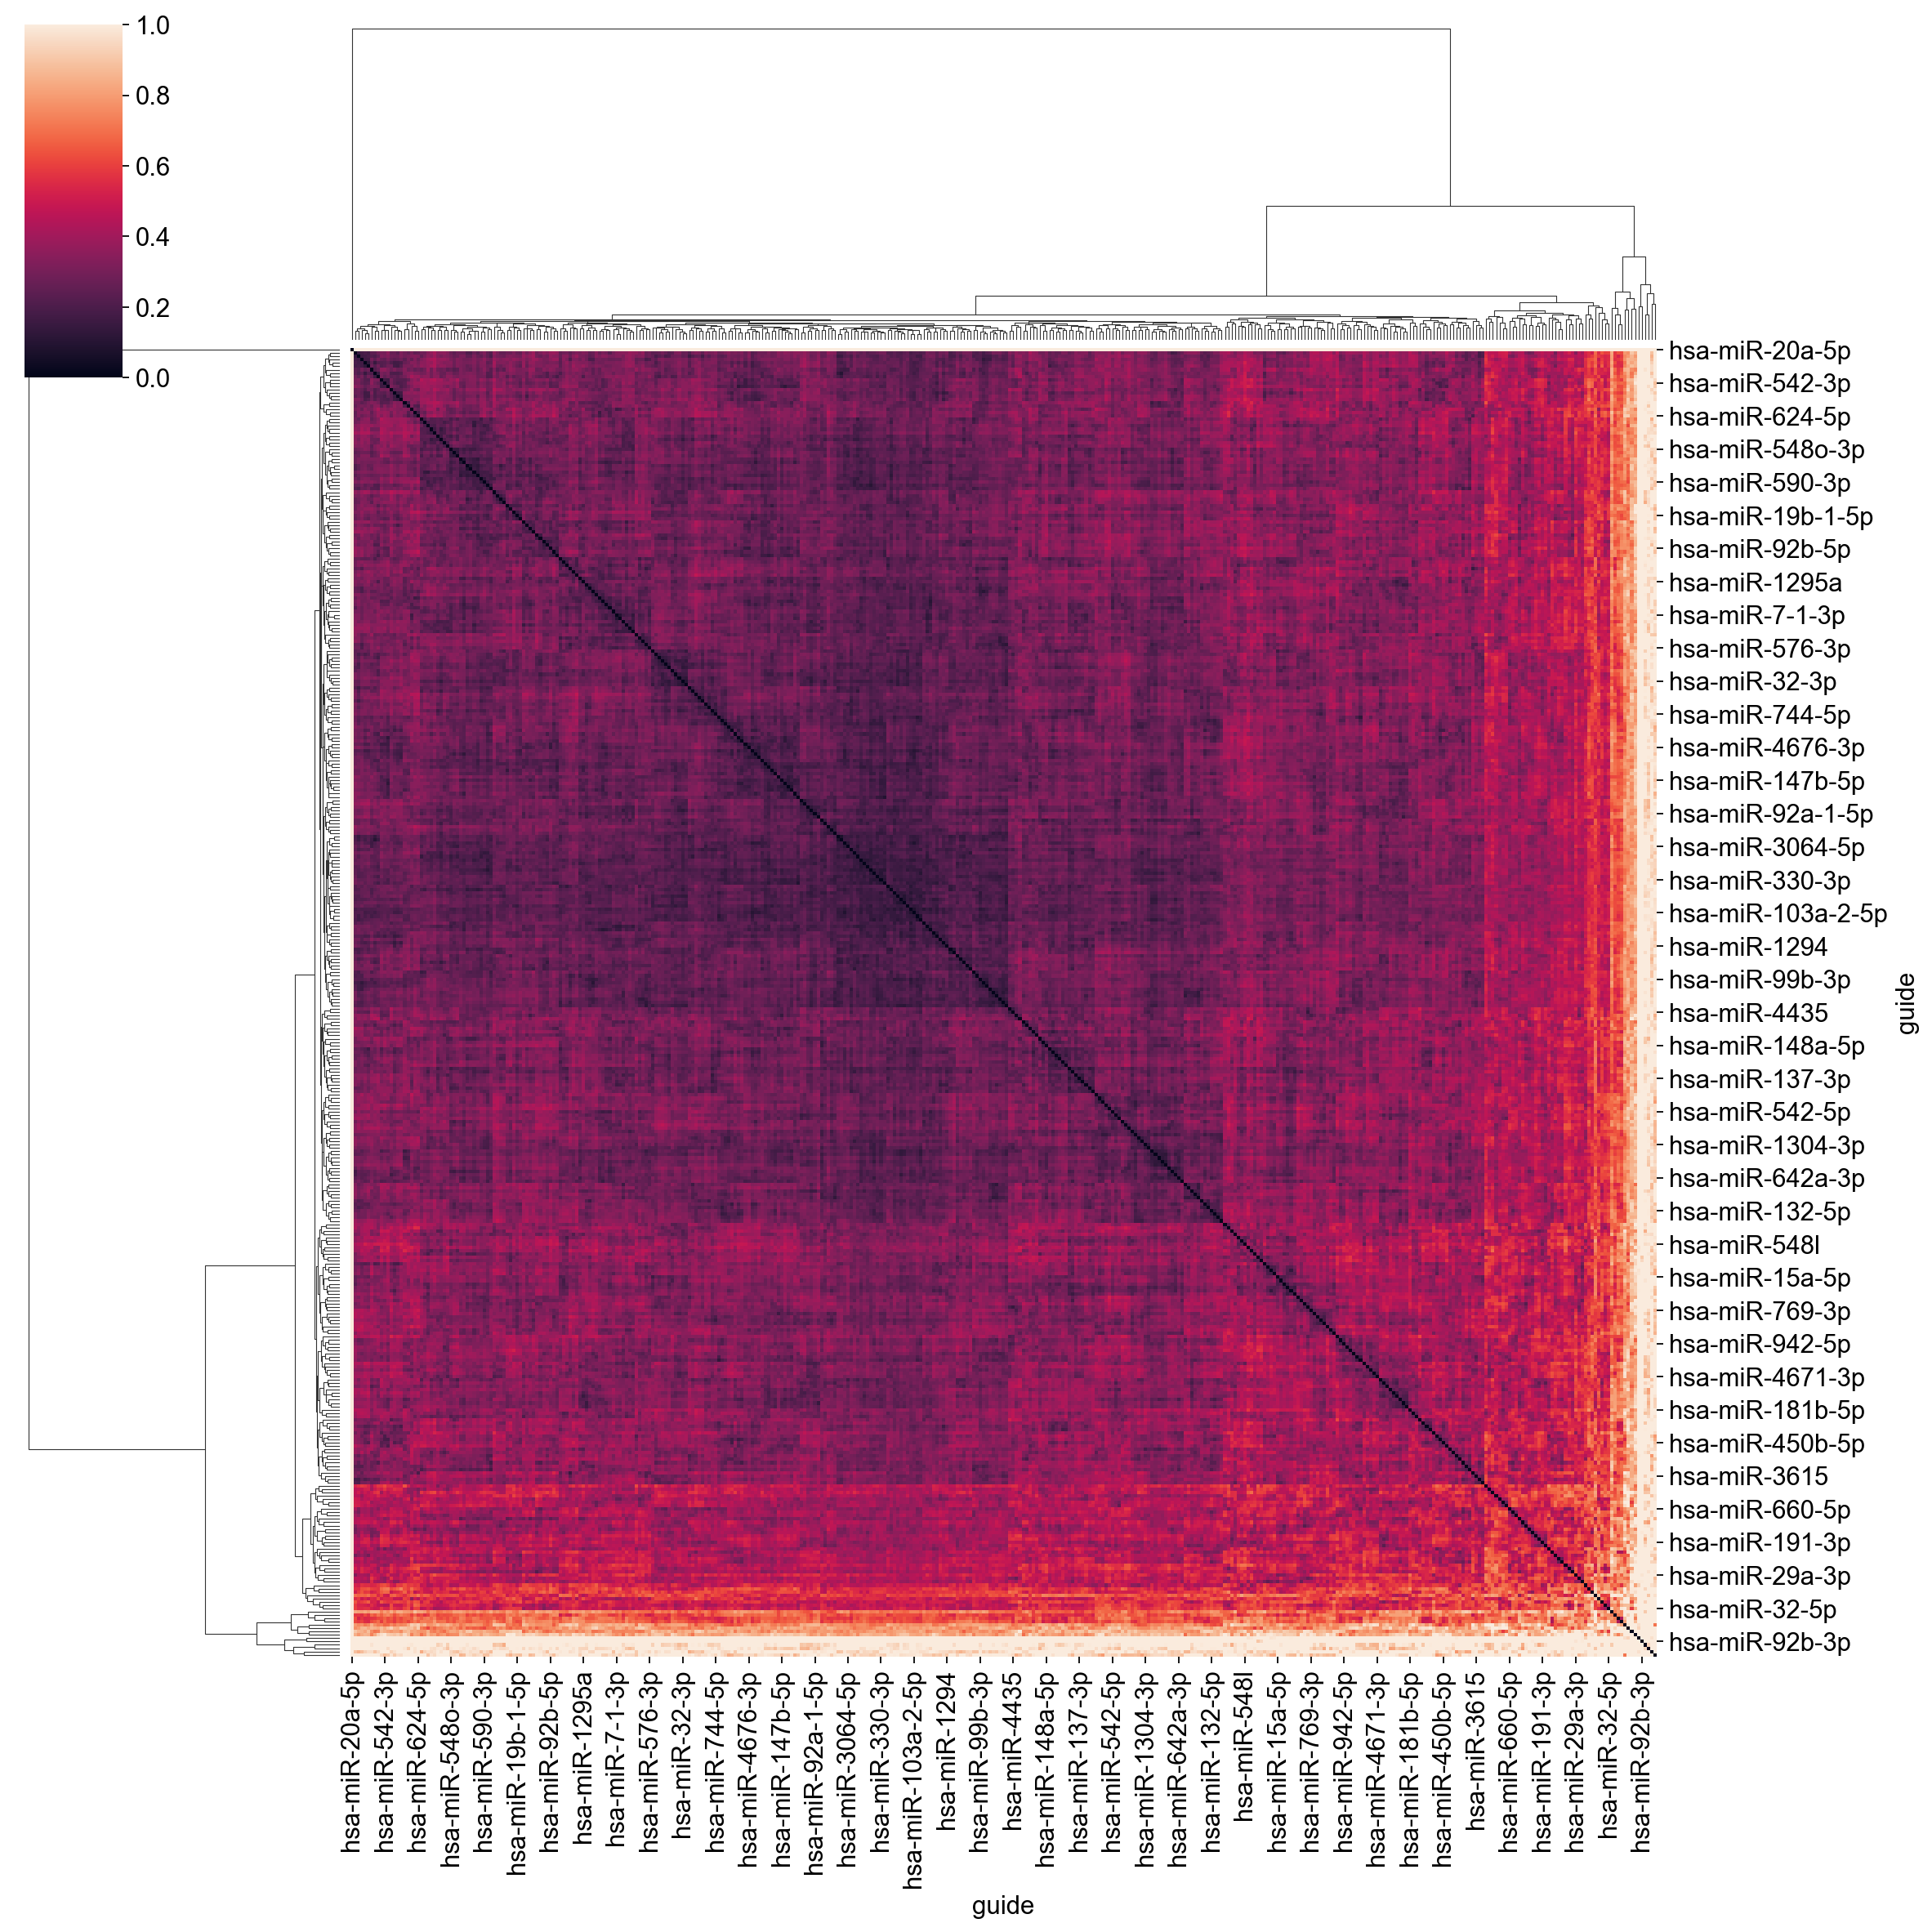

In [75]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

sns.clustermap(pd.DataFrame(squareform(pdist(merged)), index=merged.index, columns=merged.index), vmax=1, figsize=(15,15))
plt.savefig("/home/ssobti/projects/mir_tud/output_data/mave_output/Classification_model_R10000_K1_C1_T1/mudf_pairwise_distance.pdf")

In [76]:
pd.DataFrame(squareform(pdist(merged)), index=merged.index, columns=merged.index).to_csv("/home/ssobti/projects/mir_tud/output_data/mave_output/MAVE_trial_R10000_K1_C1_T10000/mudf_pairwise_distance.tsv", sep="\t")

In [77]:
!head /home/ssobti/projects/mir_tud/output_data/mave_output/MAVE_trial_R10000_K1_C1_T10000/mudf_pairwise_distance.tsv

guide	TuD_NC_02	TuD_NC_03	TuD_NC_04	TuD_NC_05	TuD_NC_06	TuD_NC_07	TuD_NC_08	TuD_NC_09	TuD_NC_10	TuD_NC_11	TuD_NC_12	TuD_NC_13	TuD_NC_14	TuD_NC_15	TuD_NC_16	TuD_NC_17	TuD_NC_18	TuD_NC_19	TuD_NC_20	hsa-let-7a-2-3p	hsa-let-7a-5p	hsa-let-7b-3p	hsa-let-7d-3p	hsa-let-7f-2-3p	hsa-let-7i-3p	hsa-let-7i-5p	hsa-miR-7-1-3p	hsa-miR-7-5p	hsa-miR-9-3p	hsa-miR-9-5p	hsa-miR-10a-3p	hsa-miR-10a-5p	hsa-miR-15a-5p	hsa-miR-15b-3p	hsa-miR-15b-5p	hsa-miR-16-2-3p	hsa-miR-16-5p	hsa-miR-17-3p	hsa-miR-18a-3p	hsa-miR-18a-5p	hsa-miR-19b-1-5p	hsa-miR-19b-3p	hsa-miR-20a-3p	hsa-miR-20a-5p	hsa-miR-21-3p	hsa-miR-21-5p	hsa-miR-22-3p	hsa-miR-22-5p	hsa-miR-23a-5p	hsa-miR-23b-3p	hsa-miR-23b-5p	hsa-miR-24-1-5p	hsa-miR-24-2-5p	hsa-miR-24-3p	hsa-miR-25-3p	hsa-miR-25-5p	hsa-miR-26a-1-3p	hsa-miR-26a-2-3p	hsa-miR-26a-5p	hsa-miR-27a-5p	hsa-miR-27b-3p	hsa-miR-27b-5p	hsa-miR-28-3p	hsa-miR-28-5p	hsa-miR-29a-3p	hsa-miR-29a-5p	hsa-miR-29b-1-5p	hsa-miR-29b-3p	hsa-miR-29c-5p	hsa-miR-30a-3p	hsa-miR-30a-5p	hsa-miR-30b-3p	hsa-miR-30c-1-3p	h

/home/ssobti/miniconda3/envs/mave/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


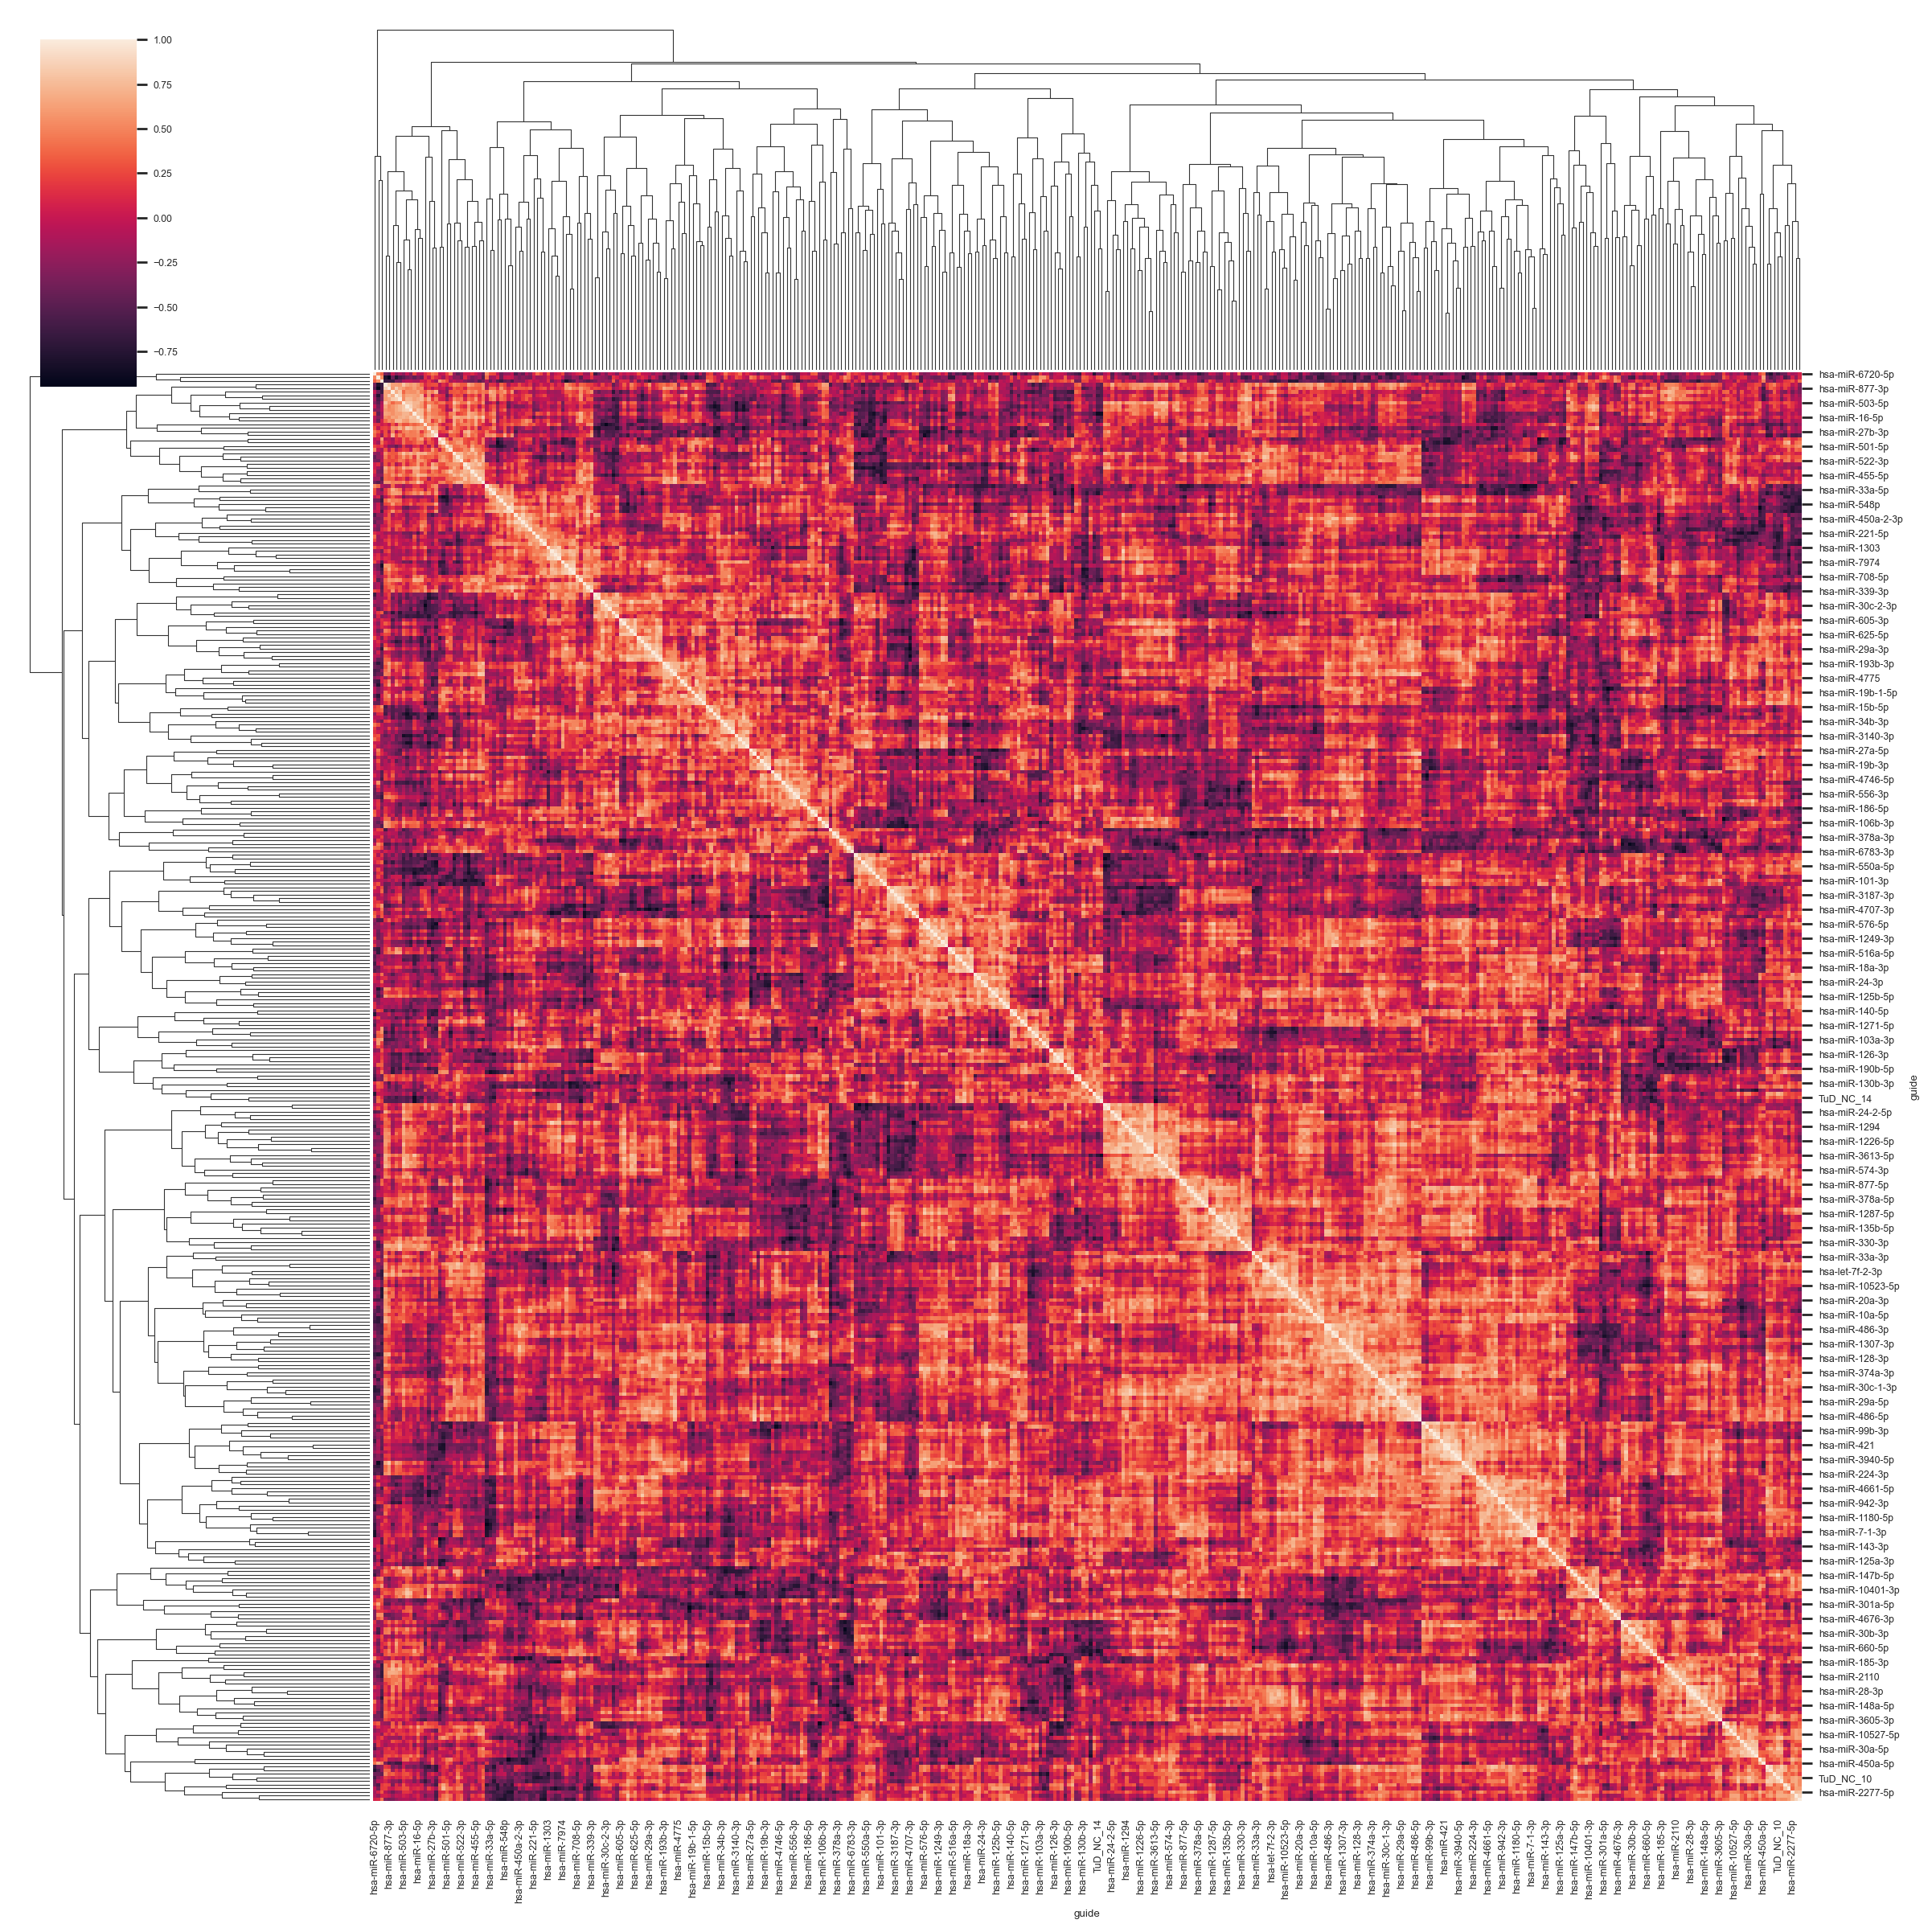

In [78]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(font_scale=0.5)
sns.clustermap(merged.T.corr(), figsize=(15,15))
plt.savefig("/home/ssobti/projects/mir_tud/output_data/mave_output/Classification_model_R10000_K1_C1_T1/mudf_corr.pdf")

In [79]:
gmtmat_df.shape

(19073, 3725)

In [80]:
rbpdf = pd.DataFrame(rbp_act, columns=gmtmat_df.columns)
rbpdf.index = np.array(adata[randomized_cbc_list,:].obs.index, dtype="|U64")
rbpdf.head()

MIR153_5P   MIR8485   MIR3662    MIR607  MIR616_5P  \
miR_1:AAACCCAAGGAGAGGC-1  -0.244490 -0.196628 -0.194089  0.072656  -0.923156   
miR_1:AAACCCAAGGTAAACT-1  -0.191368  0.782629  0.002397 -0.229614  -0.222102   
miR_1:AAACCCACAACGATCT-1  -0.709284  0.545418 -0.721413 -0.518966  -0.224691   
miR_1:AAACCCACACGATTCA-1  -0.895939  0.903237 -0.170400 -0.810908  -0.483358   
miR_1:AAACCCACAGTCAACT-1  -0.648453  0.699565 -0.045222  0.075553  -0.526067   

                          MIR371B_5P  MIR373_5P  MIR6867_5P  MIR12136  \
miR_1:AAACCCAAGGAGAGGC-1   -1.964006  -0.514992    0.527577  0.640207   
miR_1:AAACCCAAGGTAAACT-1   -2.168757  -0.190528    0.147993 -0.103855   
miR_1:AAACCCACAACGATCT-1   -2.135895  -0.345440    0.699500  0.690822   
miR_1:AAACCCACACGATTCA-1   -3.770181  -1.149400    0.572424  1.231521   
miR_1:AAACCCACAGTCAACT-1   -1.283777   0.158833    0.384918 -0.523591   

                          MIR548AJ_3P_MIR548X_3P  ...  E2F1DP1RB_01  \
miR_1:AAACCCAAGGAGAGGC-1               -1.788748  ...      1.346225   
miR_1:AAACCCAAGGTAAACT-1               -1.432133  ...      1.120872   
miR_1:AAACCCACAACGATCT-1               -1.881766  ...      1.606307   
miR_1:AAACCCACACGATTCA-1               -2.577652  ...      1.413927   
miR_1:AAACCCACAGTCAACT-1               -1.939387  ...      0.352253   

                          E2F_Q3_01  E2F_Q4_01  E2F_Q6_01  E2F1_Q3_01  \
miR_1:AAACCCAAGGAGAGGC-1  -0.042227  -0.177252  -1.356489   -0.849950   
miR_1:AAACCCAAGGTAAACT-1   0.236681   0.463570  -0.526429   -1.143002   
miR_1:AAACCCACAACGATCT-1   0.406912   0.333474  -1.169921   -0.834745   
miR_1:AAACCCACACGATTCA-1   0.025745   0.577266  -1.488629   -0.936482   
miR_1:AAACCCACAGTCAACT-1   0.529646   0.825877  -0.211511   -0.964504   

                          E2F1_Q4_01  E2F1_Q6_01  KTGGYRSGAA_UNKNOWN  \
miR_1:AAACCCAAGGAGAGGC-1    1.554387    1.651024           -0.008123   
miR_1:AAACCCAAGGTAAACT-1    1.094139    1.156817           -0.072238   
miR_1:AAACCCACAACGATCT-1    1.749350    1.475358            0.001124   
miR_1:AAACCCACACGATTCA-1    2.330999    2.425483            0.024515   
miR_1:AAACCCACAGTCAACT-1    0.473362    0.950259           -0.130941   

                          RRCCGTTA_UNKNOWN  SGCGSSAAA_E2F1DP2_01  
miR_1:AAACCCAAGGAGAGGC-1         -0.329108             -0.539943  
miR_1:AAACCCAAGGTAAACT-1         -0.297765             -0.207792  
miR_1:AAACCCACAACGATCT-1         -0.345820             -0.120505  
miR_1:AAACCCACACGATTCA-1         -0.312066             -0.393101  
miR_1:AAACCCACAGTCAACT-1         -0.221961              0.025121  

[5 rows x 3725 columns]

In [81]:
merged = rbpdf.merge(adata[randomized_cbc_list,:].obs[["guide"]], left_index=True, right_index=True).groupby(["guide"]).median()
merged.head()

MIR153_5P   MIR8485   MIR3662    MIR607  MIR616_5P  MIR371B_5P  \
guide                                                                       
TuD_NC_01  -0.316391  0.212930 -0.246066 -0.037772  -0.553674   -2.263982   
TuD_NC_02  -0.353577  0.249024 -0.242049 -0.031787  -0.673369   -2.458684   
TuD_NC_03  -0.349961  0.185775 -0.317334 -0.066568  -0.579265   -2.310256   
TuD_NC_04  -0.365879  0.284366 -0.186200 -0.051695  -0.619398   -2.502737   
TuD_NC_05  -0.277439  0.155285 -0.227599  0.002789  -0.580598   -2.314711   

           MIR373_5P  MIR6867_5P  MIR12136  MIR548AJ_3P_MIR548X_3P  ...  \
guide                                                               ...   
TuD_NC_01  -0.295360    0.551127  0.215073               -1.847608  ...   
TuD_NC_02  -0.399361    0.615307  0.133484               -2.241702  ...   
TuD_NC_03  -0.352563    0.574365  0.235954               -1.946906  ...   
TuD_NC_04  -0.296309    0.517707  0.189640               -1.925518  ...   
TuD_NC_05  -0.297475    0.497552  0.256286               -1.960228  ...   

           E2F1DP1RB_01  E2F_Q3_01  E2F_Q4_01  E2F_Q6_01  E2F1_Q3_01  \
guide                                                                  
TuD_NC_01      1.175889   0.178664   0.417967  -0.836166   -1.030396   
TuD_NC_02      1.141649   0.216211   0.526179  -0.922199   -1.054037   
TuD_NC_03      1.226390   0.192806   0.518540  -0.830808   -1.131035   
TuD_NC_04      1.274765   0.168329   0.414201  -0.852716   -1.055395   
TuD_NC_05      1.124401   0.173578   0.455324  -0.847664   -1.081439   

           E2F1_Q4_01  E2F1_Q6_01  KTGGYRSGAA_UNKNOWN  RRCCGTTA_UNKNOWN  \
guide                                                                     
TuD_NC_01    1.565680    1.883038           -0.038466         -0.273164   
TuD_NC_02    1.677257    2.130207           -0.047540         -0.301322   
TuD_NC_03    1.552783    1.974853           -0.032384         -0.285555   
TuD_NC_04    1.680578    1.992305           -0.034166         -0.228318   
TuD_NC_05    1.650030    1.844132           -0.041925         -0.300733   

           SGCGSSAAA_E2F1DP2_01  
guide                            
TuD_NC_01             -0.258317  
TuD_NC_02             -0.257107  
TuD_NC_03             -0.239327  
TuD_NC_04             -0.275126  
TuD_NC_05             -0.246572  

[5 rows x 3725 columns]

/home/ssobti/miniconda3/envs/mave/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


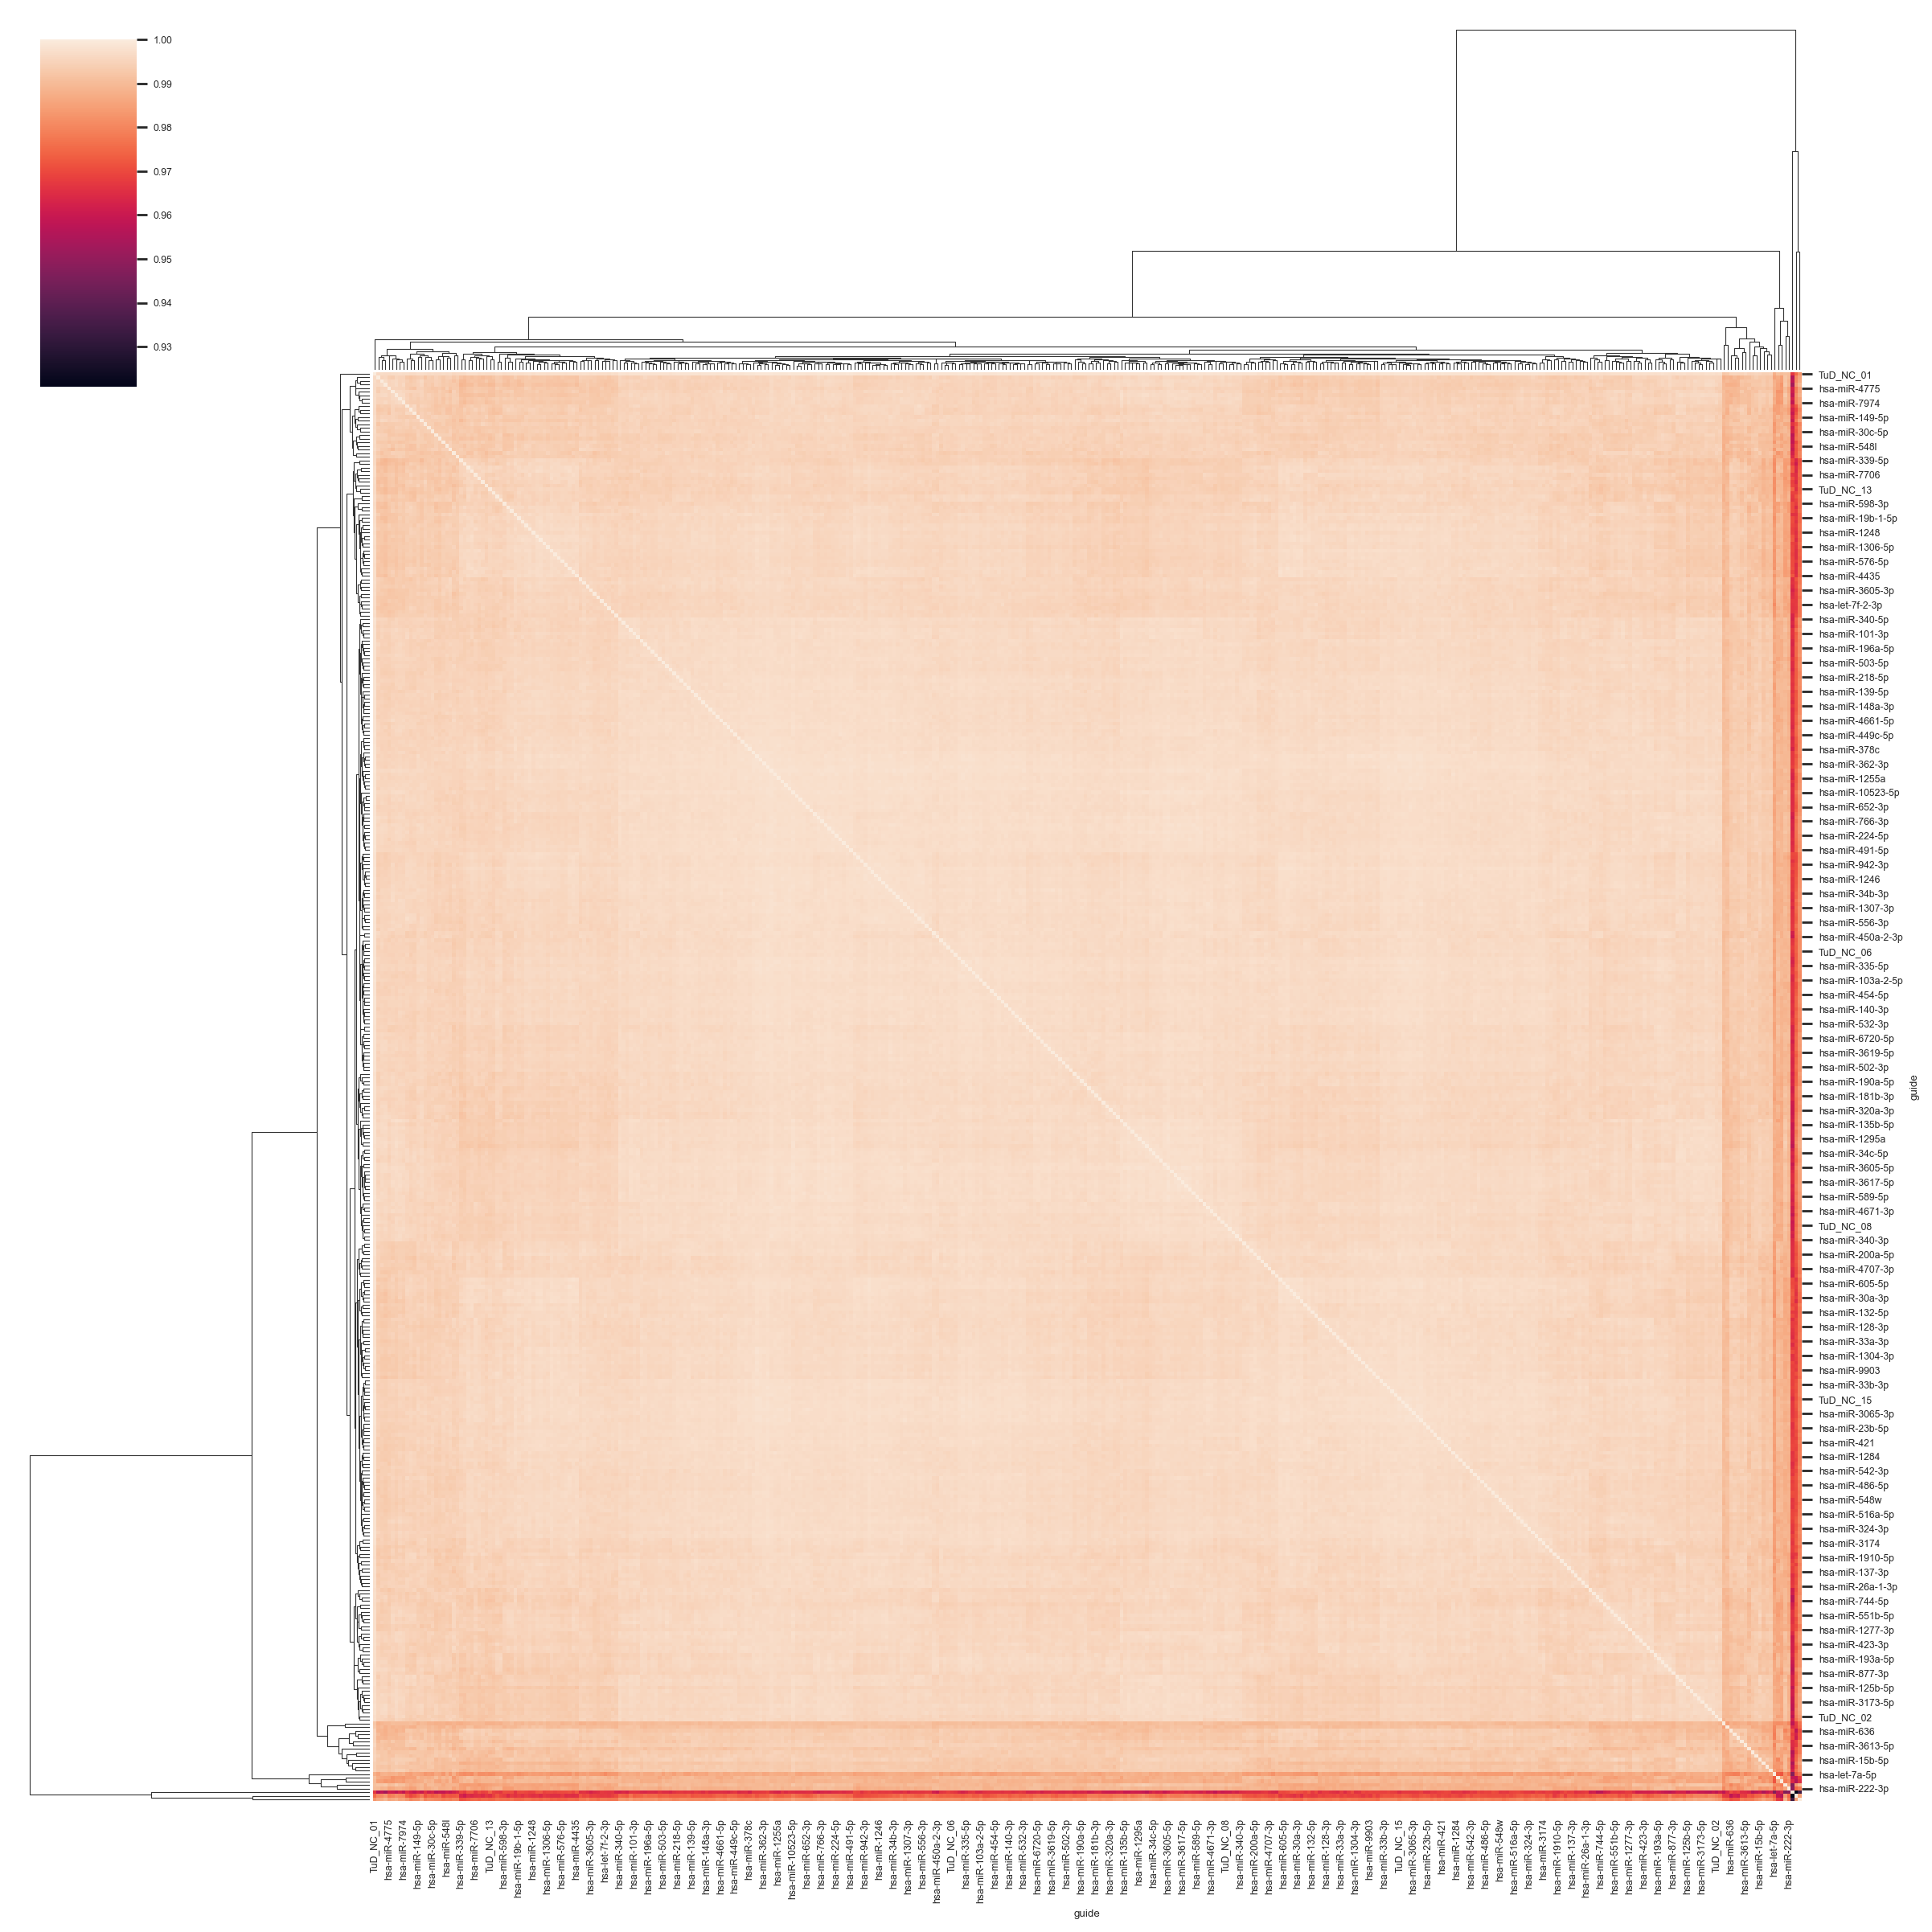

In [82]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(font_scale=0.5)
sns.clustermap(merged.T.corr(), figsize=(15,15))
plt.savefig("/home/ssobti/projects/mir_tud/output_data/mave_output/Classification_model_R10000_K1_C1_T1/rbpdf_corr.pdf")